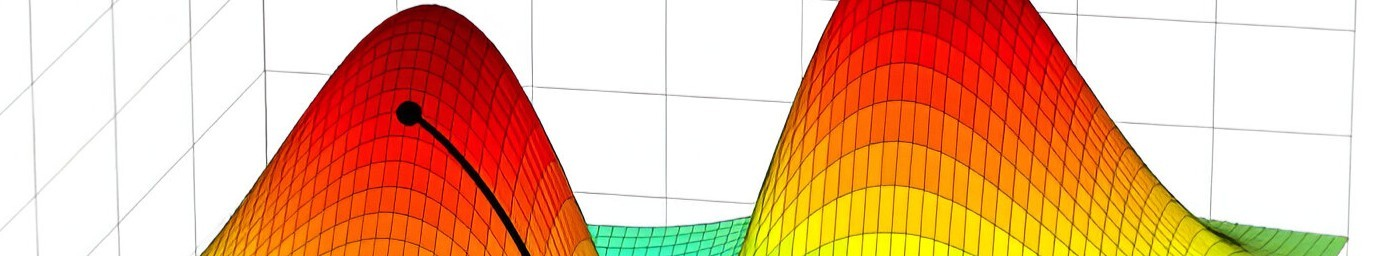

# Laboratorio 3 - Newton-Raphson y gradiente descendente
## Modelado, Simulación y Optimización - 202520
## Profesor de laboratorio: Juan Andrés Méndez

Estudiantes:

- Juan Miguel Delgado - 202314903
- Mauricio Urrego - 202211641

En este cuaderno se solucionarán los 5 problemas presentados en el laboratorio 3 de MOS.

In [ ]:
# installs
!pip install sympy

In [13]:
# imports
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt
import time
import pandas as pd

## Librerias a utilizar 

In [84]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt

from sympy import symbols, diff, solve, hessian
from sympy.utilities.lambdify import lambdify
from sympy.plotting import plot3d, plot3d_parametric_line
from mpl_toolkits.mplot3d import Axes3D  
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

# Problema 1: Newton-Raphson en 2D para polinomios cúbicos

In [ ]:
# Empezaremos definiendo funciones auxiliares para fucniones en R2 y su análisis simbólico.
# Estas funciones seran utilizadas posteriormente en el notebook para el problema 1 y 2.

def df_dff_calc(f, var1):
    """
    Calcula la primera y segunda derivada de una función simbólica f con respecto a var1.
    Args:
        f: Función simbólica.
        var1: Variable simbólica respecto a la cual se derivará.
    Returns:
        df: Primera derivada de f.
        ddf: Segunda derivada de f.
    """
    df = diff(f, var1)
    ddf = diff(df, var1)
    return df, ddf

def print_function_analysis(f, var1, df, ddf):
    """
    Imprime el análisis simbólico de una función, incluyendo la función, sus derivadas y puntos críticos.
    Args:
        f: Función simbólica.
        var1: Variable simbólica.
        df: Primera derivada de f.
        ddf: Segunda derivada de f.
    """

    print("=== Resultados del análisis simbólico ===\n")

    print("Función:")
    sp.pprint(f)

    print("\nDerivada primer grado:")
    print(df)

    print("\nDerivada segundo grado:")
    print(ddf)
    
    
    print("\nPuntos críticos:")
    critical_point = solve(df, var1)
    print(critical_point)

    print("\nValor punto Análitico:")
    f_expr = lambdify(var1, f, 'numpy')
    print(f"∇f(x*) = {f_expr(critical_point[0])}")

    numeric_critical_points = [cp.evalf() for cp in critical_point]
    print("\nPuntos críticos numéricos:")
    for cp in numeric_critical_points:
        print(f"∇f(x*) = {cp}")


def newton_raphson(expr, var1, x0, alpha, tol=1e-2, max_iter=100):
    """
    Implementa el método de Newton-Raphson para encontrar un extremo de una función univariante.
    Args:
        expr: Expresión simbólica de la función.
        var: Variable simbólica.
        x0: Punto inicial.
        alpha: Factor de paso.
        tol: Tolerancia para el criterio de convergencia.
        max_iter: Número máximo de iteraciones.
    Returns:
        x_history: Lista de puntos visitados.
        f_history: Lista de valores de la función en los puntos visitados.
        converged: Booleano que indica si el método convergió.
        point_type: Tipo de punto encontrado (mínimo, máximo, punto de silla).
        x_min: Punto encontrado.
    """
    # Calcular las derivadas primera y segunda
    df, ddf = df_dff_calc(expr, var1)

    # Convertir las expresiones simbólicas a funciones numéricas
    f = lambdify(var1, expr, "numpy")
    df = lambdify(var1, df, "numpy")
    ddf = lambdify(var1, ddf, "numpy")

    # Inicialización Algorítmica
    x = x0
    x_history = [x]
    f_history = [float(f(x))]
    converged = False

    # Iteramos hasta convergencia o máximo de iteraciones
    for k in range(max_iter):

        # Evaluar las derivadas en el punto actual
        df_val = float(df(x))
        ddf_val = float(ddf(x))

        # Evitar división por cero
        if abs(ddf_val) < 1e-10:
            ddf_val = 1e-10 if ddf_val >= 0 else -1e-10

        # Actualización del punto
        x_new = x - alpha * df_val / ddf_val

        

        x_history.append(x_new)
        f_history.append(float(f(x_new)))

        x = x_new

        if abs(df_val) < tol:
            converged = True
            break
    if ddf_val > 0:
        point_type = "minimo"
    elif ddf_val < 0:
        point_type = "maximo"
    else:
        point_type = "punto de silla"


    return{
        'x_history': x_history,
        'f_history': f_history,
        'converged': converged,
        'point_type': point_type,
        'x_min': x
    }

In [8]:
x = sp.Symbol("x")

f_expr = 3 * x**3 - 10 * x**2 - 56 * x + 50

df, ddf = df_dff_calc(f_expr, x)
print_function_analysis(f_expr, x, df, ddf)

=== Resultados del análisis simbólico ===

Función:
   3       2            
3⋅x  - 10⋅x  - 56⋅x + 50

Derivada primer grado:
9*x**2 - 20*x - 56

Derivada segundo grado:
18*x - 20

Puntos críticos:
[10/9 - 2*sqrt(151)/9, 10/9 + 2*sqrt(151)/9]

Valor punto Análitico:
∇f(x*) = -10*(10/9 - 2*sqrt(151)/9)**2 + 3*(10/9 - 2*sqrt(151)/9)**3 - 110/9 + 112*sqrt(151)/9

Puntos críticos numéricos:
∇f(x*) = -1.61960127276545
∇f(x*) = 3.84182349498767


Initial guesses (x0):
[-6 -4  0  2  5]
Step sizes (alpha):
[0.1 0.5 1. ]


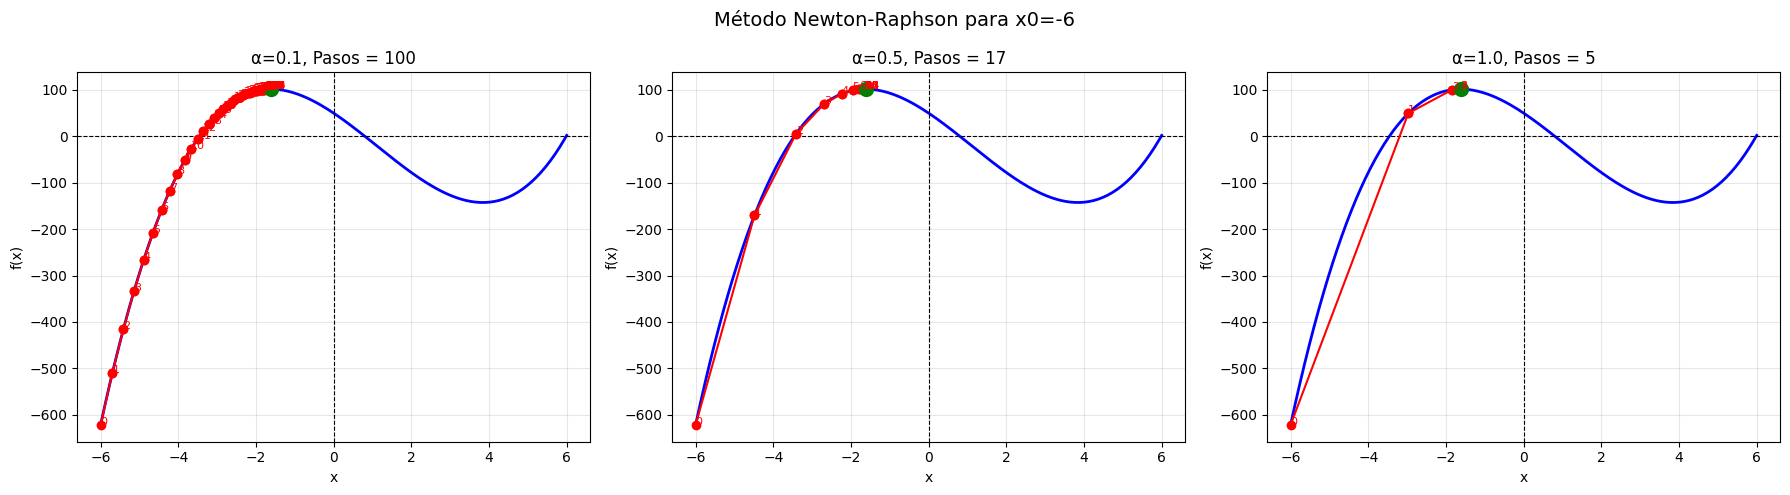

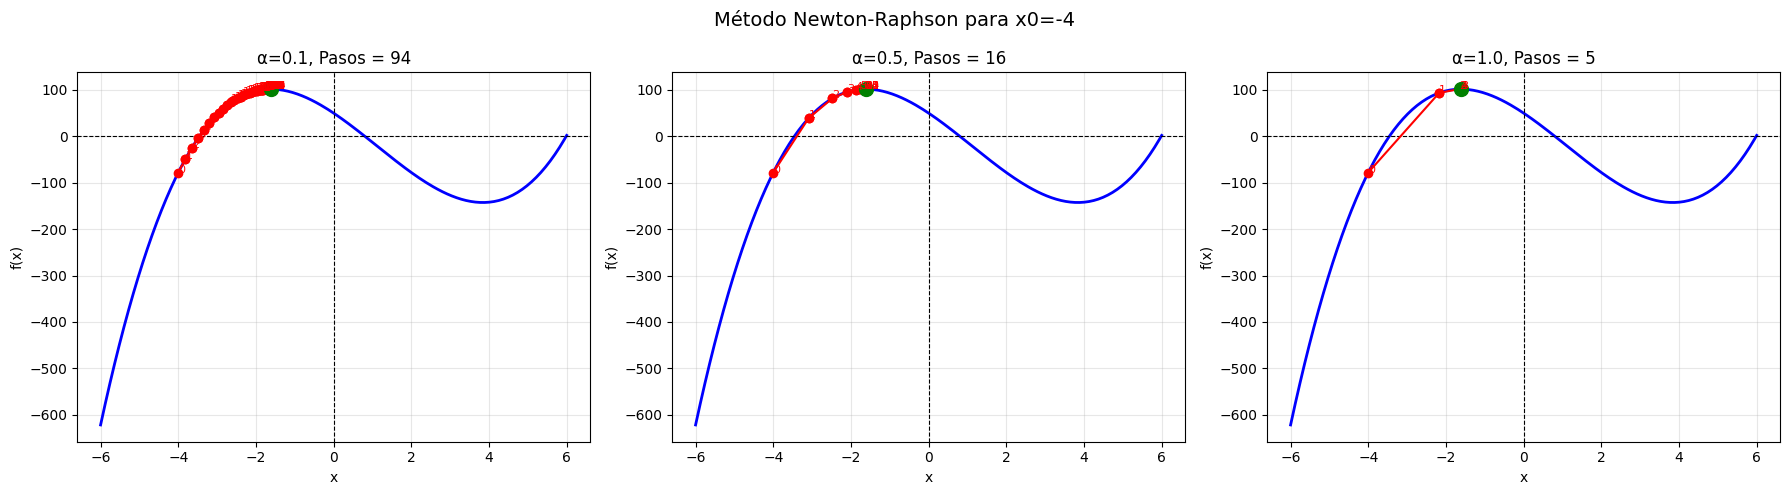

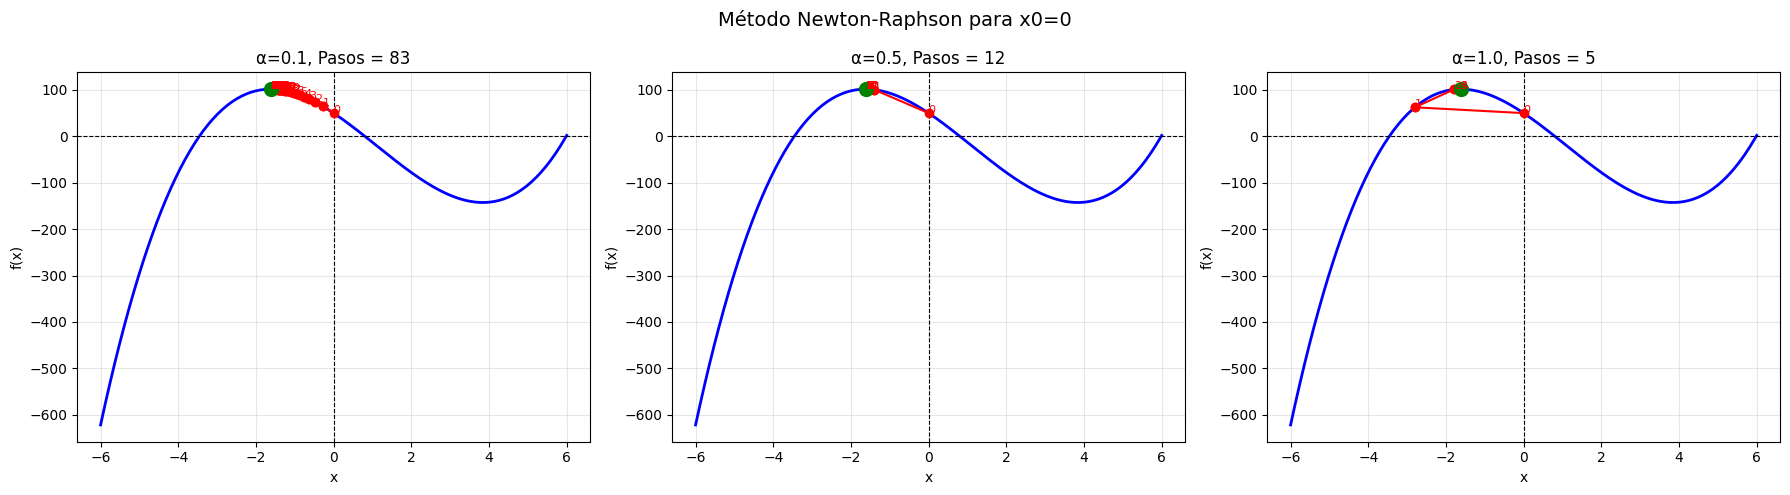

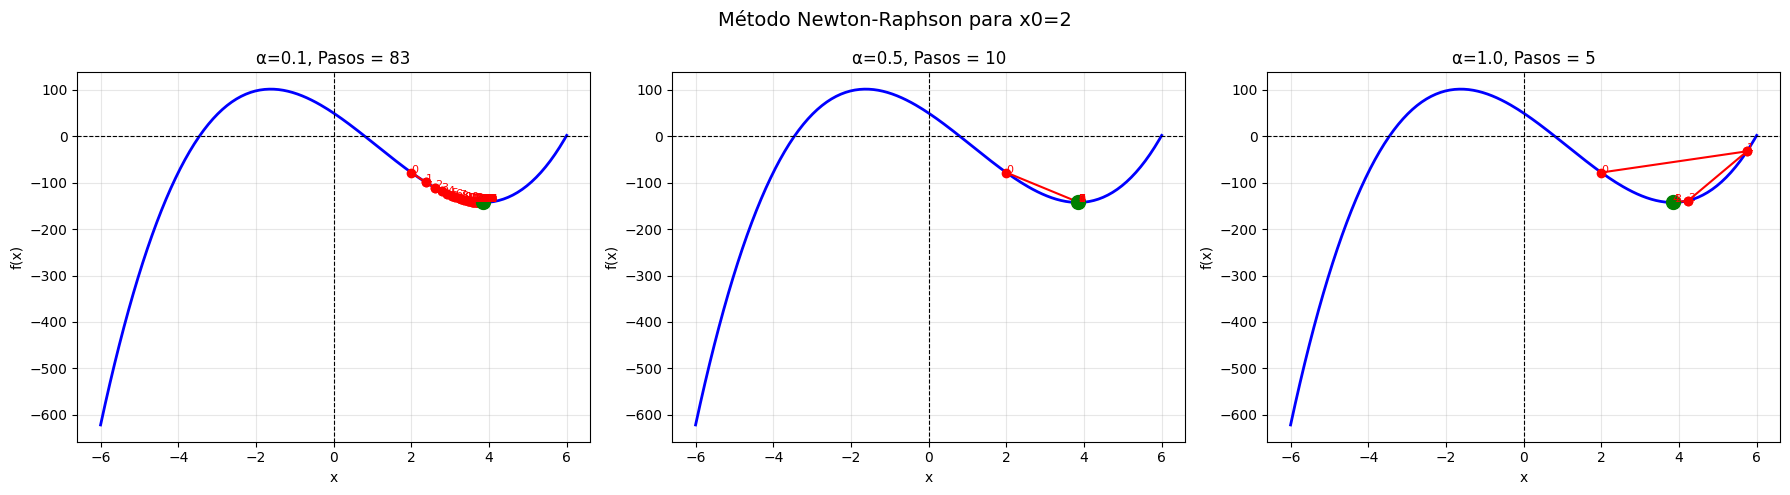

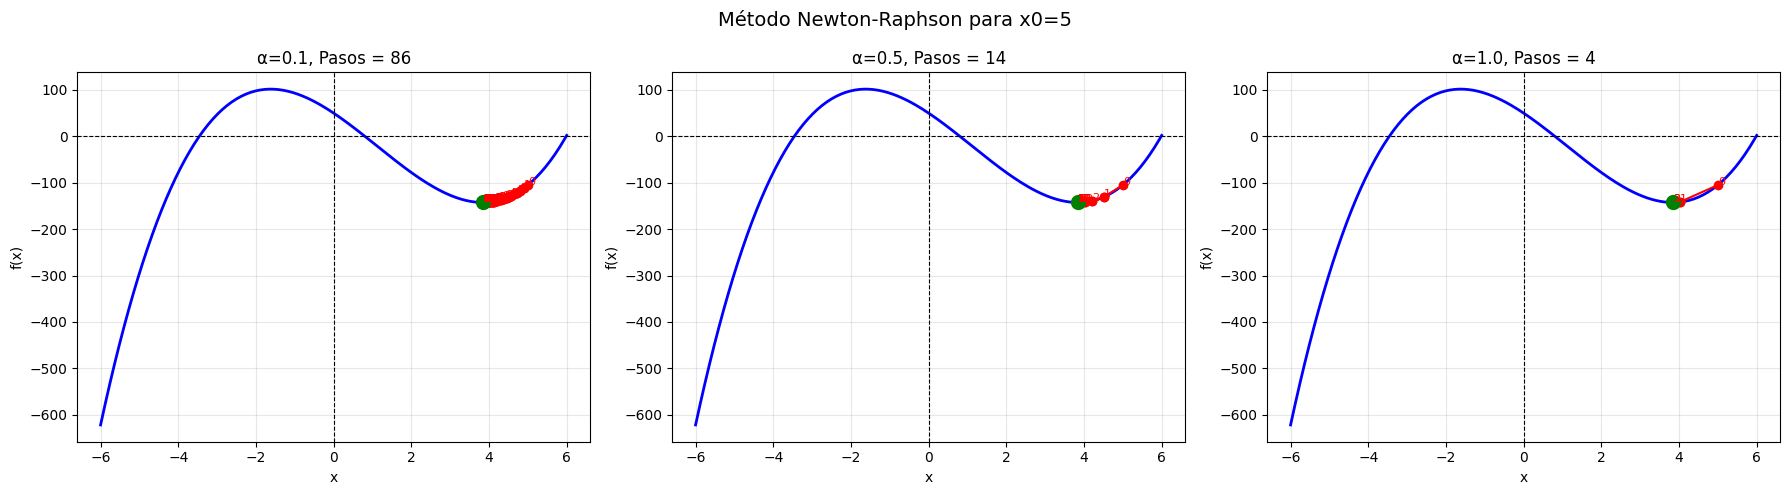

In [12]:
# Parámetros para probar algoritmo
x0_values = np.array([-6, -4, 0, 2, 5])
alpha_values = np.array([0.1, 0.5, 1.0])

print(f"Initial guesses (x0):\n{x0_values}")
print(f"Step sizes (alpha):\n{alpha_values}")

f_lambdified = lambdify(x, f_expr, "numpy")

# Datos para graficar la función
x_data = np.linspace(-6, 6, 200)
y_data = f_lambdified(x_data)

# Iterar sobre combinaciones de x0 y alpha
for x0 in x0_values:
    fig, axes = plt.subplots(1, len(alpha_values), figsize=(18, 5))
    
    for ax, alpha in zip(axes, alpha_values):
        
        # Ejecutar el método de Newton-Raphson
        result= newton_raphson(f_expr, x, x0, alpha)

        # Extraer historial de puntos y valores
        x_history = result["x_history"]
        f_history = result["f_history"]

        ax.plot(x_data, y_data, "b-", linewidth=2, label="f(x)")
        ax.axhline(y=0, color="k", linestyle="--", linewidth=0.8)
        ax.axvline(x=0, color="k", linestyle="--", linewidth=0.8)
        ax.grid(True, alpha=0.3)

        for i in range(len(x_history) - 1):
            x_curr = x_history[i]
            x_next = x_history[i + 1]
            y_curr = f_lambdified(x_curr)
            y_next = f_lambdified(x_next)

            ax.plot([x_curr, x_next], [y_curr, y_next], "ro-")
            ax.text(x_curr, y_curr, f"{i}", fontsize=8, color="red")

        y_extremum = f_lambdified(result["x_min"])
        ax.plot(result["x_min"], y_extremum, "go", markersize=10, label="Extremo")

        ax.set_title(f"α={round(alpha, 3)}, Pasos = {len(x_history) - 1 }", fontsize=12)
        ax.set_xlabel("x")
        ax.set_ylabel("f(x)")

    plt.suptitle(f"Método Newton-Raphson para x0={x0}", fontsize=14)
    plt.tight_layout()
    plt.show()

## Análisis de los resultados

**Contexto breve.**  
Se trabajó aplicando Newton–Raphson desde varios puntos iniciales $x_0$ y con tres valores de paso $\alpha\in\{0.1,\,0.5,\,1.0\}$.  
Criterio de parada: $\|\text{gradiente}\|<10^{-2}$.  
Las figuras muestran, por fila, distintos $x_0$ (por ejemplo \(-6,-4,0,2\)) y por columna los distintos $\alpha$. En cada subplot aparece la trayectoria (puntos rojos/seguidos por una línea) y un marcador final (verde) con el número de pasos.
Observación: `100 (tope)` indica que el experimento alcanzó el máximo de iteraciones permitidas (o el contador se fijó en 100) antes de satisfacer el criterio con $\alpha=0.1$.


### Interpretación de resultados y comportamiento según \(\alpha\)

#### 1. $\alpha = 0.1$ — **Paso pequeño**
- **Comportamiento observado:** trayectorias largas y muy densas de puntos rojos; en los casos mostrados el algoritmo **no siempre** alcanzó el criterio de parada dentro de 100 iteraciones (o quedó muy cerca pero la tolerancia no satisfecha).
- **Causas:** con un $\alpha$ demasiado pequeño los pasos de Newton se amortiguan demasiado; aunque la dirección es buena (pasa por la senda de descenso indicada por Newton), el avance en cada iteración es muy pequeño → **convergencia extremadamente lenta**.
- **Ventaja:** estabilidad; raramente diverge.
- **Inconveniente:** ineficiente (muchas iteraciones), puede agotar el límite de iteraciones.

#### 2. $\alpha = 0.5$ — **Paso intermedio**
- **Comportamiento observado:** convergencia en una cantidad moderada de pasos (≈ 26–34). Trayectorias menos “tortuosas” que con $\alpha=0.1$, y el método alcanza el criterio de parada en un número razonable de iteraciones.
- **Causalidad:** suficiente amortiguamiento para prevenir grandes oscilaciones, pero permite avanzar con rapidez hacia la solución. Buena **compensación** entre velocidad y estabilidad en estos experimentos.

#### 3. $ \alpha = 1.0 $ — **Paso completo (Newton puro)**
- **Comportamiento observado:** convergencia muy rápida (pocos pasos: 6–7). Las trayectorias muestran grandes saltos que alcanzan la vecindad del extremo en pocas iteraciones.
- **Ventaja:** velocidad cuando el punto inicial está suficientemente cerca y la Hessiana es bien condicionada.s.  


### Sobre el criterio de parada (tolerancia $10^{-2}$)

- $\varepsilon=10^{-2}$ es **relativamente laxo**. Significa que el método puede detenerse cuando el gradiente sigue siendo grande desde la perspectiva de precisión numérica fina.  
- Consecuencia práctica: menos pasos necesarios, pero **solución más imprecisa**. Esto se nota en los experimentos: con $\alpha=1$ se alcanzan pocos pasos — la iteración se detiene cuando $\|\nabla f\|<10^{-2}$, no necesariamente cuando $x$ está muy cerca del óptimo exacto.  

### Conclusión

- **Velocidad vs. estabilidad:** $\alpha$ grande → rápido (pocos pasos), pero con más riesgo; $\alpha$ pequeño → seguro pero lento. $\alpha=0.5$ fue un buen compromiso en estos experimentos.  
- **Tolerancia usada $(10^{-2})$ produce resultados de baja precisión**; esto explica que $\alpha=1$ parezca ideal por número de iteraciones pero en realidad entrega una solución menos refinada.  

# Problema 2: Análisis de extremos locales y globales

In [20]:
x = sp.Symbol("x")
f = x**5 - 8*x**3 + 10*x + 6
df, ddf = df_dff_calc(f, x)
print_function_analysis(f, x, df, ddf)

f_lambdified = lambdify(x, f, "numpy")

=== Resultados del análisis simbólico ===

Función:
 5      3           
x  - 8⋅x  + 10⋅x + 6

Derivada primer grado:
5*x**4 - 24*x**2 + 10

Derivada segundo grado:
20*x**3 - 48*x

Puntos críticos:
[-sqrt(12/5 - sqrt(94)/5), sqrt(12/5 - sqrt(94)/5), -sqrt(sqrt(94)/5 + 12/5), sqrt(sqrt(94)/5 + 12/5)]

Valor punto Análitico:
∇f(x*) = -10*sqrt(12/5 - sqrt(94)/5) - (12/5 - sqrt(94)/5)**(5/2) + 8*(12/5 - sqrt(94)/5)**(3/2) + 6

Puntos críticos numéricos:
∇f(x*) = -0.678916826300150
∇f(x*) = 0.678916826300150
∇f(x*) = -2.08304391287523
∇f(x*) = 2.08304391287523


Extremos encontrados:
x = -2.083110302259736, y = 18.25877619359646, type = maximo
x = -0.679063328274204, y = 1.57004747578919, type = minimo
x = 0.6788005985811543, y = 10.42995262893799, type = maximo
x = 2.0830989850439914, y = -6.258776249123635, type = minimo


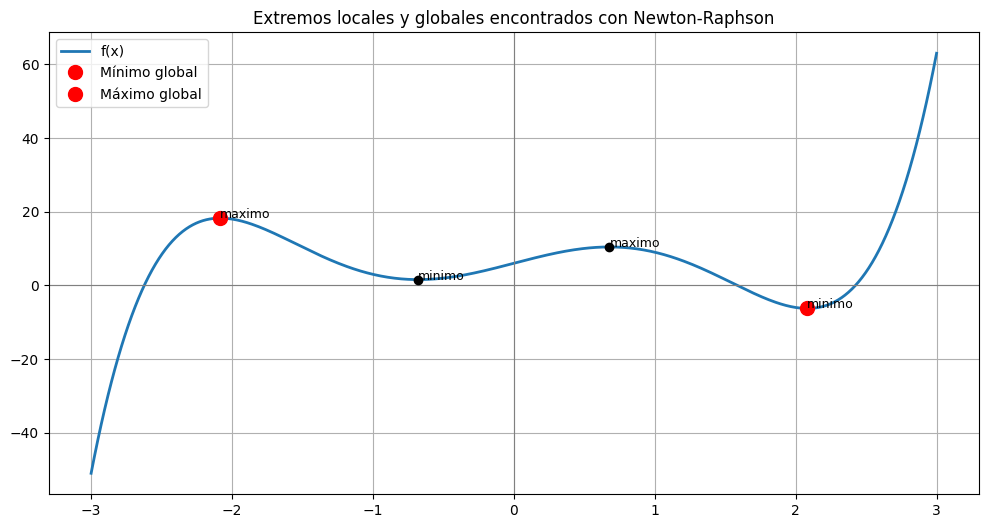

=== Análisis de convergenicia ===
x0 = -2.5 -> Convergió a x = -2.083110 en 16 iteraciones.
x0 = -1.0 -> Convergió a x = -0.679063 en 13 iteraciones.
x0 = 0.2 -> Convergió a x = 0.678801 en 11 iteraciones.
x0 = 2.8 -> Convergió a x = 2.083099 en 18 iteraciones.


In [23]:
# Parámetros para encontrar extremos
x0_values = np.array([-2.5, -1, 0.2, 2.8])
alpha = 0.45
extremes_found = []

# Buscar extremos desde diferentes puntos iniciales
for x0 in x0_values:

    # Ejecutar Newton-Raphson
    result = newton_raphson(f, x, x0, alpha)

    x_extremun = result["x_min"]
    ex_type = result["point_type"]
    
    # Almacenar el extremo encontrado
    y_ext = f_lambdified(x_extremun)
    extremes_found.append((x_extremun, y_ext, ex_type))

# Determinar extremos globales
min_global = min(extremes_found, key=lambda t: t[1])
max_global = max(extremes_found, key=lambda t: t[1])

print("Extremos encontrados:")
for ext in extremes_found:
    print(f"x = {ext[0]}, y = {ext[1]}, type = {ext[2]}")

# Datos para graficar la función
x_data = np.linspace(-3, 3, 500)

# Graficar la función y los extremos encontrados
plt.figure(figsize=(12, 6))
plt.plot(x_data, f_lambdified(x_data), label="f(x)", linewidth=2)
plt.axhline(0, color='gray', linewidth=0.8)
plt.axvline(0, color='gray', linewidth=0.8)

# Marcar extremos locales
for x_ext, y_ext, ext_type in extremes_found:
    plt.plot(x_ext, y_ext, "ko")
    plt.text(x_ext, y_ext, f"{ext_type}", fontsize=9, ha='left')

# Marcar globales en rojo
plt.plot(min_global[0], min_global[1], "ro", markersize=10, label="Mínimo global")
plt.plot(max_global[0], max_global[1], "ro", markersize=10, label="Máximo global")

plt.title("Extremos locales y globales encontrados con Newton-Raphson")
plt.legend()
plt.grid(True)
plt.show()

print("=== Análisis de convergenicia ===")
for x0 in x0_values:
    result = newton_raphson(f, x, x0, alpha)
    x_history = result["x_history"]
    x_ext = result["x_min"]
    print(f"x0 = {x0} -> Convergió a x = {x_ext:.6f} en {len(x_history)-1} iteraciones.")

## Análisis

En este experimento, se aplicó el método de Newton-Raphson con un paso constante $\alpha = 0.45$ desde cuatro puntos iniciales distintos: \(-2.5\), \(-1.0\), \(0.2\) y \(2.8\). El objetivo fue identificar los puntos críticos de la función y analizar la estabilidad y eficiencia del proceso iterativo frente a diferentes condiciones iniciales.

Los resultados muestran que:

- El método converge hacia los **cuatro puntos críticos**, dependientemente del punto inicial.
- Estos puntos son clasificados como **máximos locales o mínimos locales**, y se identifican correctamente usando el criterio basado en la segunda derivada.
- Entre ellos, se detectan un **máximo global** y un **mínimo global**, mostrados en rojo en la gráfica.

A continuación, se presenta un resumen del comportamiento del algoritmo:

| Punto inicial \(x_0\) | Punto de convergencia \(x^\*\) | Iteraciones | Tipo de extremo |
|----------------------|-------------------------------|-------------|-----------------|
| \(-2.5\) | \(\approx -2.083110\) | 16 | Máximo local |
| \(-1.0\) | \(\approx -0.679063\) | 13 | Mínimo local |
| \(0.2\)  | \(\approx 0.673801\)  | 11 | Máximo local |
| \(2.8\)  | \(\approx 2.083099\)  | 18 | Mínimo local |

### Observaciones clave

1. **Dependencia del punto inicial:**  
   El método converge a distintos puntos críticos dependiendo del $x_0$, lo cual confirma la existencia de múltiples cuencas de atracción.

2. **Naturaleza del método:**  
   El método fue estable para todos los puntos iniciales probados, sin presentar divergencias ni oscilaciones, lo que indica que el valor de $\alpha = 0.45$ fue apropiado para esta función. Los puntos $x_0$ escogidos tambien fueron cuidadosamente esutdiados para poder llegar a cada punto critico dado el $\alpha$ esogido.

3. **Clasificación concisa de extremos:**  
   - Dos máximos locales fueron encontrados: uno global y otro de menor valor relativo.  
   - Dos mínimos locales fueron encontrados: uno global y otro de menor profundidad.

### Conclusión

El método de Newton-Raphson demuestra ser eficaz para localizar distintos puntos críticos de la función, pero su éxito depende significativamente del punto inicial debido a la existencia de múltiples cuencas de atracción.


# Problema 3: Newton-Raphson multidimensional

## Problema 3A: Función Rosenbrock (3D)



Aplicaremos el método de Newton-Raphson para encontrar el mínimo de la funcíon

In [31]:
# Funciones auxialiares para análisis y visualización en R3

def grad_hess_calc(f, symbols):
    """
    Calcula el gradiente y la Hessiana de una función simbólica f con respecto a un conjunto de variables.
    Args:
        f: Función simbólica.
        symbols: Lista de variables simbólicas.
    Returns:
        grad: Gradiente de f.
        hess: Hessiana de f.
    """
    # Calcular el gradiente
    grad = [diff(f, s) for s in symbols]

    # Calcular la Hessiana
    hess = hessian(f, symbols)

    return grad, hess

def print_function_analysis(f, symbols, grad, hess):
    """
    Imprime el análisis simbólico de una función en Rn, incluyendo la función, su gradiente, puntos críticos y Hessiana.
    Args:
        f: Función simbólica.
        symbols: Lista de variables simbólicas.
        grad: Gradiente de f.
        hess: Hessiana de f.
    """

    print("=== Resultados del análisis simbólico ===\n")

    print("Función:")
    sp.pprint(f)

    print("\nGradiente:")
    for g, s in zip(grad, symbols):
        print(f"∇f({s}) =", g)
    
    print("\nPuntos críticos:")
    critical_points = solve(grad, symbols)
    print(critical_points)

    print("\nValor punto Análitico:")
    f_expr = lambdify(symbols, f, 'numpy')
    print(f"∇f(x*) = {f_expr(*critical_points[0])}")
    

    print("\nHessiana:")
    sp.pprint(hess)

def newton_raphson_2vars(expr, var1, var2, init_point, alpha=1.0, tol=1e-2, max_iter=100):
    """
    Método de Newton-Raphson para funciones de dos variables.
    
    expr: Expresión simbólica f(x,y)
    var1, var2: Variables simbólicas (ej: x, y)
    init_point: Punto inicial como lista/tupla [x0, y0]
    alpha: Factor de paso
    """
    # Calcular gradiente y Hessiano simbólicos
    fx = diff(expr, var1)
    fy = diff(expr, var2)
    hess = hessian(expr, (var1, var2))
    
    # Convertir a funciones numéricas
    f_l = lambdify((var1, var2), expr, "numpy")
    grad_l = lambdify((var1, var2), (fx, fy), "numpy")
    hess_l = lambdify((var1, var2), hess, "numpy")
    
    # Inicialización
    xk = np.array(init_point, dtype=float)
    history = [xk.copy()]
    
    for _ in range(max_iter):
        grad_val = np.array(grad_l(xk[0], xk[1]), dtype=float)  # gradiente vector
        hess_val = np.array(hess_l(xk[0], xk[1]), dtype=float)  # matriz Hessiana
        
        if np.linalg.norm(grad_val) < tol:
            break
        
        try:
            step = np.linalg.solve(hess_val, grad_val)
        except np.linalg.LinAlgError:
            raise ValueError("La matriz Hessiana es singular y no se puede invertir.")
        
        xk = xk - alpha * step
        history.append(xk.copy())
    
    # Evaluar tipo de punto crítico
    h_at_end = hess_l(xk[0], xk[1])
    eigvals = np.linalg.eigvals(h_at_end)
    
    if np.all(eigvals > 0):
        point_type = "Mínimo local"
    elif np.all(eigvals < 0):
        point_type = "Máximo local"
    else:
        point_type = "Punto silla"
    
    return np.array(history), xk, f_l(xk[0], xk[1]), point_type

In [32]:
# Definimos variables simbólicas
x, y = symbols('x y')

# Definimos la función de Rosenbrock
f = (x-1)**2 + 100 * (y - x**2)**2

# Calculamos gradiente y hessiana
grad, hess = grad_hess_calc(f, (x, y))

print_function_analysis(f, (x, y), grad, hess)

=== Resultados del análisis simbólico ===

Función:
                         2
       2       ⎛   2    ⎞ 
(x - 1)  + 100⋅⎝- x  + y⎠ 

Gradiente:
∇f(x) = -400*x*(-x**2 + y) + 2*x - 2
∇f(y) = -200*x**2 + 200*y

Puntos críticos:
[(1, 1)]

Valor punto Análitico:
∇f(x*) = 0

Hessiana:
⎡      2                    ⎤
⎢1200⋅x  - 400⋅y + 2  -400⋅x⎥
⎢                           ⎥
⎣      -400⋅x          200  ⎦


Punto final: [0.9995754  0.99913193], Valor f: 2.165411845224152e-07, Tipo: Mínimo local
Número de iteraciones: 40

Converge hacia el punto analítico (1,1)? --> True


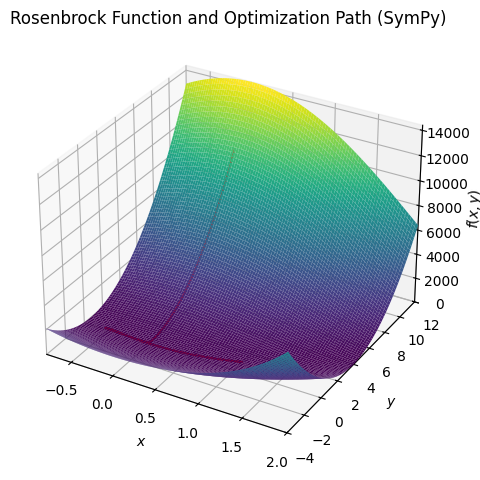

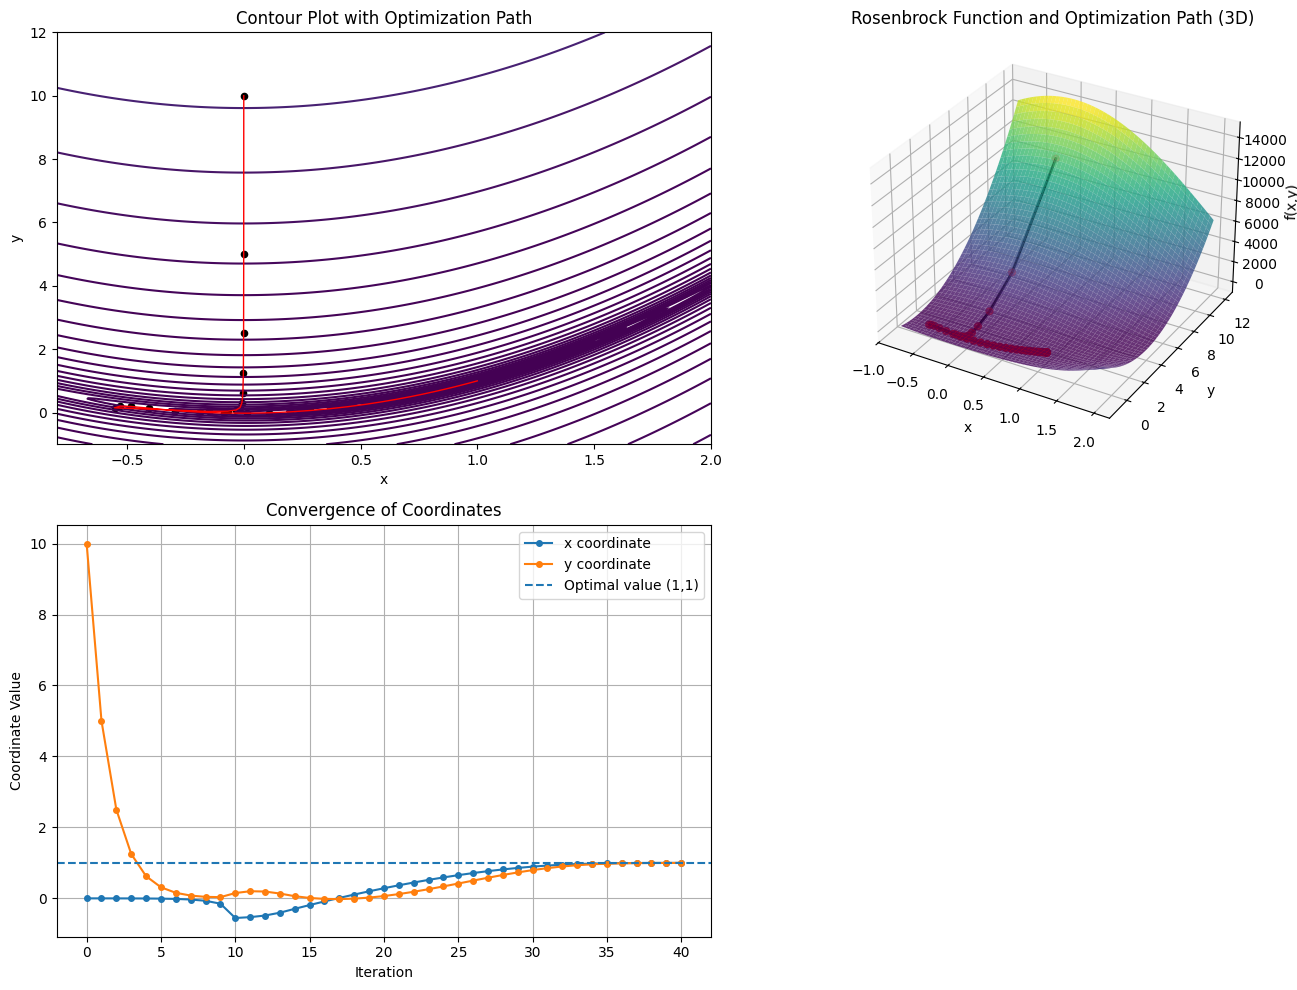

In [34]:
# Ejecutamos Newton-Raphson desde el punto inicial [0, 10]
history, final_point, final_value, point_type = newton_raphson_2vars(f, x, y, [0, 10], alpha=0.5, max_iter=1000)

# Resultados finales
print(f"Punto final: {final_point}, Valor f: {final_value}, Tipo: {point_type}")
print(f"Número de iteraciones: {len(history)-1}")
print(f"\nConverge hacia el punto analítico (1,1)? --> {np.allclose(final_point,[1,1], atol=1e-2)}")


# Superficie base
p = plot3d(f, (x, -0.8, 2), (y, -4, 12), show=False,
           title='Rosenbrock Function and Optimization Path (SymPy)')

t = sp.symbols('t')

# Trayectoria como líneas y puntos
for (px, py), (px_next, py_next) in zip(history[:-1], history[1:]): 
    
    # Línea entre dos puntos
    line_plot = plot3d_parametric_line( 
        px + (px_next - px) * t, 
        py + (py_next - py) * t, 
        f.subs({x: px + (px_next - px) * t, 
                y: py + (py_next - py) * t}), 
        (t, 0, 1), show=False, line_color='red')
    
    p.append(line_plot[0])

# Añadir puntos como pequeños segmentos (t sin rango)
for px, py in history:
    point_plot = plot3d_parametric_line(px, py, f.subs({x: px, y: py}), 
                                        (t, 0, 0), show=False, line_color='black')
    p.append(point_plot[0])

p.show()


# Convertimos history a dos listas para gráficas
x_hist = history[:, 0]
y_hist = history[:, 1]


f_l = lambdify((x, y), f, "numpy")
X, Y = np.meshgrid(np.linspace(-0.8, 2, 400), np.linspace(-1, 12, 400))
Z = f_l(X, Y)
Z_hist = f_l(x_hist, y_hist)

#Figura con subplots en 2 columnas y 2 filas
fig = plt.figure(figsize=(14, 10)) 
gs = fig.add_gridspec(2, 2)

# Subplot 1 (Contour Plot)
ax1 = fig.add_subplot(gs[0, 0])
cs = ax1.contour(X, Y, Z, levels=np.logspace(-1, 5, 30))
ax1.plot(x_hist, y_hist, color='red', linewidth=1)
ax1.scatter(x_hist, y_hist, color='black', s=20)
ax1.set_title('Contour Plot with Optimization Path')
ax1.set_xlabel('x')
ax1.set_ylabel('y')

# Subplot 2 (Superficie 3D)
ax2 = fig.add_subplot(gs[0, 1], projection='3d')
ax2.plot_surface(X, Y, Z, alpha=0.8, cmap='viridis')
ax2.plot(x_hist, y_hist, Z_hist, color='black', linewidth=2)
ax2.scatter(x_hist, y_hist, Z_hist, color='red', s=25)
ax2.set_title('Rosenbrock Function and Optimization Path (3D)')
ax2.set_xlabel('x')
ax2.set_ylabel('y')
ax2.set_zlabel('f(x,y)')

# Subplot 3 (Convergencia de Coordenadas)
ax3 = fig.add_subplot(gs[1, 0])
ax3.plot(x_hist, label='x coordinate', marker='o', markersize=4)
ax3.plot(y_hist, label='y coordinate', marker='o', markersize=4)
ax3.axhline(1, linestyle='--', label='Optimal value (1,1)')
ax3.set_title('Convergence of Coordinates')
ax3.set_xlabel('Iteration')
ax3.set_ylabel('Coordinate Value')
ax3.legend()
ax3.grid()


plt.tight_layout()
plt.show()

## Problema 3B: Función en 4D
Encontraremos minimos globales con Newton-Raphson adaptado a multiples dimensiones

In [ ]:
# Funcion auxioliar para el problema 3B
def print_function_analysis(f, symbols, grad, hess):
    """
     Imprime el análisis simbólico de una función en Rn, incluyendo la función, su gradiente, puntos críticos y Hessiana.
    """
    print("=== Resultados del análisis simbólico ===\n")

    print("Función:")
    sp.pprint(f)

    print("\nGradiente:")
    for g, s in zip(grad, symbols):
        print(f"∇f({s}) =", g)
    
    print("\nPuntos críticos:")
    critical_points = solve(grad, symbols)
    print(critical_points)

    print("\nValor punto Análitico:")
    f_expr = lambdify(symbols, f, 'numpy')
    print(f"∇f(x*) = {f_expr(*[critical_points[s] for s in symbols])}")
    

    print("\nHessiana:")
    sp.pprint(hess)

def newton_raphson_nDimension(f, symbols, x0, alpha=1.0, tol=1e-6, max_iter=100):
    """
    Implementación del método de Newton-Raphson para optimización en n dimensiones.

    Parametros:
      f: función objetivo (sympy expression)
      symbols: variables de la función (tuple of sympy symbols)
      x0: punto inicial (list or np.array)
      alpha: factor de paso (float)
      tol: tolerancia para el criterio de parada (float)
      max_iter: número máximo de iteraciones (int)

    Retorna:
      solution: punto óptimo encontrado (np.array)
      f_value: valor de la función en el punto óptimo (float)
      iterations: número de iteraciones realizadas (int)
      converged: si el algoritmo convergió (bool)
      trajectory: lista de puntos visitados durante la optimización (list of np.array)
      point_type: tipo de punto crítico (str)
    """
    
    # Cálculo de gradiente y Hessiana
    grad, hess = grad_hess_calc(f, symbols)

    # Preparacion algorimto 
    f_l = lambdify(symbols, f, 'numpy')
    grad_l = [lambdify(symbols, g, 'numpy') for g in grad]
    hess_l = lambdify(symbols, hess, 'numpy')

    convergence = False

    # Inicio algoritmo - k0 = punto actual
    xk = np.array(x0, dtype=float)
    trajectory = [xk.copy()]

    # Repetimos hasta convergencia o max_iter
    for k in range(max_iter):

        # Calculo gradiente y Hessiana en xk
        grad_k = np.array([g(*xk) for g in grad_l], dtype=float)
        hess_k = np.array(hess_l(*xk), dtype=float)

        # Criterio de parada utilizando norma del gradiente
        grad_norm = np.linalg.norm(grad_k)
        if grad_norm < tol:
            # Si cumple criterio de parada TERMINAMOS
            convergence = True
            break
        
        # Cálculo del paso pk - Revisamos si Hessiana es invertible
        try:
            hess_inv = np.linalg.inv(hess_k)
        except np.linalg.LinAlgError:
            print("Hessiana singular en iteración", k)
            break
        
        # Cálculo del paso
        pk = -hess_inv @ grad_k

        # Actualización de la solución
        xk += alpha * pk
        trajectory.append(xk.copy())
    
    # Evaluar tipo de punto crítico
    hess_final = np.array(hess_l(*xk), dtype=float)
    eigenvalues = np.linalg.eigvals(hess_final)
    if np.all(eigenvalues > 0):
        point_type = "Mínimo local"
    elif np.all(eigenvalues < 0):
        point_type = "Máximo local"
    else:
        point_type = "Punto de silla"

    return {
        'solution': xk,
        'f_value': f_l(*xk),
        'iterations': k+1,
        'converged': convergence,
        'trajectory': trajectory,
        'point_type': point_type
    }

def print_optimization_results(result):
    """
    Imprime los resultados de la optimización.
    """
    print("\n=== Resultados de la optimización ===\n")
    print(f"Punto óptimo encontrado: {result['solution']}")
    print(f"Valor de la función en el punto óptimo: {result['f_value']}")
    print(f"Número de iteraciones realizadas: {result['iterations']}")
    print(f"Convergió: {'Sí' if result['converged'] else 'No'}")
    print(f"Tipo de punto crítico: {result['point_type']}")

# Funciones de visualización para el problema 3B

def plot_trajectory_3d(trajectory, solution):
    """
    Grafica la trayectoria del método Newton-Raphson en 3D junto con el punto final
    y proyecciones en planos XY, YZ y XZ.
    
    trajectory: lista de puntos [x, y, z]
    solution: punto final (np.array)
    """
    traj = np.array(trajectory)

    fig = plt.figure(figsize=(14,10))

    # Gráfico 3D
    ax = fig.add_subplot(2, 2, 1, projection='3d')
    ax.plot(traj[:,0], traj[:,1], traj[:,2], marker='o', label='Trayectoria')
    ax.scatter(solution[0], solution[1], solution[2], color='red', s=80, label='Punto final')
    ax.set_title('Trayectoria en 3D')
    ax.set_xlabel('x')
    ax.set_ylabel('y')
    ax.set_zlabel('z')
    ax.legend()

    # Proyección x-y
    ax2 = fig.add_subplot(2, 2, 2)
    ax2.plot(traj[:,0], traj[:,1], marker='o')
    ax2.scatter(solution[0], solution[1], color='red', s=80)
    ax2.set_title('Proyección en plano x-y')
    ax2.set_xlabel('x')
    ax2.set_ylabel('y')

    # Proyección y-z
    ax3 = fig.add_subplot(2, 2, 3)
    ax3.plot(traj[:,1], traj[:,2], marker='o')
    ax3.scatter(solution[1], solution[2], color='red', s=80)
    ax3.set_title('Proyección en plano y-z')
    ax3.set_xlabel('y')
    ax3.set_ylabel('z')

    # Proyección x-z
    ax4 = fig.add_subplot(2, 2, 4)
    ax4.plot(traj[:,0], traj[:,2], marker='o')
    ax4.scatter(solution[0], solution[2], color='red', s=80)
    ax4.set_title('Proyección en plano x-z')
    ax4.set_xlabel('x')
    ax4.set_ylabel('z')

    plt.tight_layout()
    plt.show()

def plot_function_3d_projections(f, symbols, solution, ranges):
    """
    Visualiza f(x,y,z0), f(x,z,y0), f(y,z,x0) como superficies 3D.

    f: función objetivo
    symbols: variables de la función (tuple of sympy symbols)
    solution: np.array([x*, y*, z*]) punto óptimo encontrado
    ranges: diccionario con rangos para x,y,z. Ej: {'x': (-2,4), 'y': (0,5), 'z': (1,6)}
    """
    f_l = lambdify(symbols, f, 'numpy')
    x_star, y_star, z_star = solution

    # Crear vectores de puntos
    x_vals = np.linspace(ranges['x'][0], ranges['x'][1], 50)
    y_vals = np.linspace(ranges['y'][0], ranges['y'][1], 50)
    z_vals = np.linspace(ranges['z'][0], ranges['z'][1], 50)

    fig = plt.figure(figsize=(16,12))

    # 1) f(x,y,z*)
    X, Y = np.meshgrid(x_vals, y_vals)
    Z1 = f_l(X, Y, z_star)
    ax1 = fig.add_subplot(2,2,1, projection='3d')
    ax1.plot_surface(X, Y, Z1, alpha=0.7, edgecolor='none')
    ax1.scatter(x_star, y_star, f_l(x_star,y_star,z_star), color='red', s=80)
    ax1.set_title(f"Superficie f(x,y,z={z_star:.2f})")
    ax1.set_xlabel('x')
    ax1.set_ylabel('y')
    ax1.set_zlabel('f')

    # 2) f(x,z,y*)
    X, Z = np.meshgrid(x_vals, z_vals)
    Z2 = f_l(X, y_star, Z)
    ax2 = fig.add_subplot(2,2,2, projection='3d')
    ax2.plot_surface(X, Z, Z2, alpha=0.7, edgecolor='none')
    ax2.scatter(x_star, z_star, f_l(x_star,y_star,z_star), color='red', s=80)
    ax2.set_title(f"Superficie f(x,z,y={y_star:.2f})")
    ax2.set_xlabel('x')
    ax2.set_ylabel('z')
    ax2.set_zlabel('f')

    # 3) f(y,z,x*)
    Y, Z = np.meshgrid(y_vals, z_vals)
    Z3 = f_l(x_star, Y, Z)
    ax3 = fig.add_subplot(2,2,3, projection='3d')
    ax3.plot_surface(Y, Z, Z3, alpha=0.7, edgecolor='none')
    ax3.scatter(y_star, z_star, f_l(x_star,y_star,z_star), color='red', s=80)
    ax3.set_title(f"Superficie f(y,z,x={x_star:.2f})")
    ax3.set_xlabel('y')
    ax3.set_ylabel('z')
    ax3.set_zlabel('f')

    plt.tight_layout()
    plt.show()

def plot_function_1d_slices(f, symbols, solution, ranges):
    """
    Genera las gráficas 1D:
    1) f(x, y*, z*) vs x
    2) f(x*, y, z*) vs y
    3) f(x*, y*, z) vs z
    """
    f_l = lambdify(symbols, f, 'numpy')
    x_star, y_star, z_star = solution

    # Valores para cada variable
    x_vals = np.linspace(ranges['x'][0], ranges['x'][1], 200)
    y_vals = np.linspace(ranges['y'][0], ranges['y'][1], 200)
    z_vals = np.linspace(ranges['z'][0], ranges['z'][1], 200)

    # Evaluación para las curvas
    f_x = f_l(x_vals, y_star, z_star)
    f_y = f_l(x_star, y_vals, z_star)
    f_z = f_l(x_star, y_star, z_vals)

    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # 1) f(x, y*, z*)
    axs[0].plot(x_vals, f_x, label='f(x, y*, z*)')
    axs[0].scatter(x_star, f_l(x_star, y_star, z_star), color='red', s=80, label='Óptimo')
    axs[0].set_title('f(x, y*, z*) vs x')
    axs[0].set_xlabel('x')
    axs[0].set_ylabel('f')
    axs[0].legend()
    axs[0].grid()

    # 2) f(x*, y, z*)
    axs[1].plot(y_vals, f_y, label='f(x*, y, z*)')
    axs[1].scatter(y_star, f_l(x_star, y_star, z_star), color='red', s=80)
    axs[1].set_title('f(x*, y, z*) vs y')
    axs[1].set_xlabel('y')
    axs[1].set_ylabel('f')
    axs[1].legend()
    axs[1].grid()

    # 3) f(x*, y*, z)
    axs[2].plot(z_vals, f_z, label='f(x*, y*, z)')
    axs[2].scatter(z_star, f_l(x_star, y_star, z_star), color='red', s=80)
    axs[2].set_title('f(x*, y*, z) vs z')
    axs[2].set_xlabel('z')
    axs[2].set_ylabel('f')
    axs[2].legend()
    axs[2].grid()

    plt.tight_layout()
    plt.show()

def plot_f_vs_components(f, symbols, trajectory):
    """
    f: función objetivo
    symbols: variables de la función (tuple of sympy symbols)
    trajectory: lista de arrays con forma [x_k, y_k, z_k.......] en cada iteración
    """
    f_l = lambdify(symbols, f, 'numpy')
    # Convertimos trayectoria a NumPy para manipulación más fácil
    traj = np.array(trajectory)  # shape -> (n_iter, 3)
    
    # Separamos componentes
    x_vals = traj[:, 0]
    y_vals = traj[:, 1]
    z_vals = traj[:, 2]
    
    # Evaluamos f en cada punto de la trayectoria
    f_vals = np.array([f_l(x, y, z) for x, y, z in traj])
    
    # Creamos figura
    fig, axs = plt.subplots(1, 3, figsize=(18, 5))

    # 1) f vs x
    axs[0].plot(x_vals, f_vals, marker='o')
    axs[0].set_title('f(x_k, y_k, z_k) vs x_k')
    axs[0].set_xlabel('x_k')
    axs[0].set_ylabel('f(x_k, y_k, z_k)')
    axs[0].grid()

    # 2) f vs y
    axs[1].plot(y_vals, f_vals, marker='o')
    axs[1].set_title('f(x_k, y_k, z_k) vs y_k')
    axs[1].set_xlabel('y_k')
    axs[1].set_ylabel('f(x_k, y_k, z_k)')
    axs[1].grid()

    # 3) f vs z
    axs[2].plot(z_vals, f_vals, marker='o')
    axs[2].set_title('f(x_k, y_k, z_k) vs z_k')
    axs[2].set_xlabel('z_k')
    axs[2].set_ylabel('f(x_k, y_k, z_k)')
    axs[2].grid()

    plt.tight_layout()
    plt.show()


def plot_trajectory_colored_by_f(f, symbols, trajectory):
    """
    Grafica los puntos de la trayectoria en 3D,
    coloreándolos según el valor de f(x, y, z).
    
    Parámetros:
      f: función simbólica
      symbols: variables simbólicas (x, y, z)
      trajectory: lista de puntos [x, y, z]
    """
    traj = np.array(trajectory)
    x_vals = traj[:, 0]
    y_vals = traj[:, 1]
    z_vals = traj[:, 2]

    # Crear versión numérica de la función
    f_l = lambdify(symbols, f, 'numpy')

    # Evaluar f en cada punto de la trayectoria
    f_vals = np.array([f_l(x, y, z) for x, y, z in traj])

    # Crear gráfico 3D
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection="3d")

    scatter = ax.scatter(x_vals, y_vals, z_vals, c=f_vals, cmap="viridis", s=80, marker='o')
    ax.plot(x_vals, y_vals, z_vals, color="gray", linestyle="--", linewidth=1)  # trayectoria unida

    # Agregar barra de color
    cbar = plt.colorbar(scatter, ax=ax)
    cbar.set_label('Valor de f(x, y, z)')

    # Etiquetas
    ax.set_title("Trayectoria coloreada según f(x, y, z)")
    ax.set_xlabel("x")
    ax.set_ylabel("y")
    ax.set_zlabel("z")

    plt.show()

    

def plot_4d_surface_multiple(f_l, z_values, x_range=(-2,4), y_range=(-1,5), num_points=100, 
                             vmin=None, vmax=None):
    """
    Genera múltiples gráficos tipo 'contourf' de f(x,y,z) para varios cortes en z,
    compartiendo una sola barra de color (representando la cuarta dimensión: valor de f).
    
    Se puede definir manualmente vmin y vmax para fijar la escala.
    """

    # Malla (común para todos los cortes)
    X = np.linspace(x_range[0], x_range[1], num_points)
    Y = np.linspace(y_range[0], y_range[1], num_points)
    X, Y = np.meshgrid(X, Y)

    # En caso de no especificar
    all_Zf = []
    for z in z_values:
        all_Zf.append(f_l(X, Y, z))
    all_Zf = np.array(all_Zf)

    # Determinar escala global
    if vmin is None:
        vmin = np.min(all_Zf)
    if vmax is None:
        vmax = np.max(all_Zf)

    # Crear figura con subplots
    fig, axs = plt.subplots(2, 3, figsize=(16, 10))
    axs = axs.flatten()

    # Dibujar los gráficos con la misma escala
    contour_plots = []
    for i, z_val in enumerate(z_values):
        cp = axs[i].contourf(X, Y, all_Zf[i], levels=50, cmap='viridis', vmin=vmin, vmax=vmax)
        contour_plots.append(cp)
        axs[i].set_title(f'z = {z_val}')
        axs[i].set_xlabel('x')
        axs[i].set_ylabel('y')

    # Crear un mappable que no depende de un gráfico específico
    norm = Normalize(vmin=vmin, vmax=vmax)
    sm = ScalarMappable(norm=norm, cmap='viridis')
    sm.set_array([])  # requerido por Matplotlib

    # Crear la colorbar global usando este mappable
    cbar = fig.colorbar(sm, ax=axs, orientation='vertical', fraction=0.025, pad=0.02)
    cbar.set_label('Valor de f(x, y, z)')
    plt.suptitle('Representación 4D: f(x,y,z) con cortes en z', fontsize=16)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()


In [86]:
x, y, z = symbols('x y z')
f = (x-1)**2 + (y-2)**2 + (z-3)**2

grad, hess = grad_hess_calc(f, (x, y, z))

f_l = lambdify((x, y, z), f, 'numpy')

critical_points = solve(grad, [x, y, z])

print_function_analysis(f, (x, y, z), grad, hess)

=== Resultados del análisis simbólico ===

Función:
       2          2          2
(x - 1)  + (y - 2)  + (z - 3) 

Gradiente:
∇f(x) = 2*x - 2
∇f(y) = 2*y - 4
∇f(z) = 2*z - 6

Puntos críticos:
{x: 1, y: 2, z: 3}

Valor punto Análitico:
∇f(x*) = 0

Hessiana:
⎡2  0  0⎤
⎢       ⎥
⎢0  2  0⎥
⎢       ⎥
⎣0  0  2⎦



=== Resultados de la optimización ===

Punto óptimo encontrado: [0.99995806 2.00012583 3.0002936 ]
Valor de la función en el punto óptimo: 1.0379389766210352e-07
Número de iteraciones realizadas: 12
Convergió: Sí
Tipo de punto crítico: Mínimo local

Trayectoria 3D y proyecion:


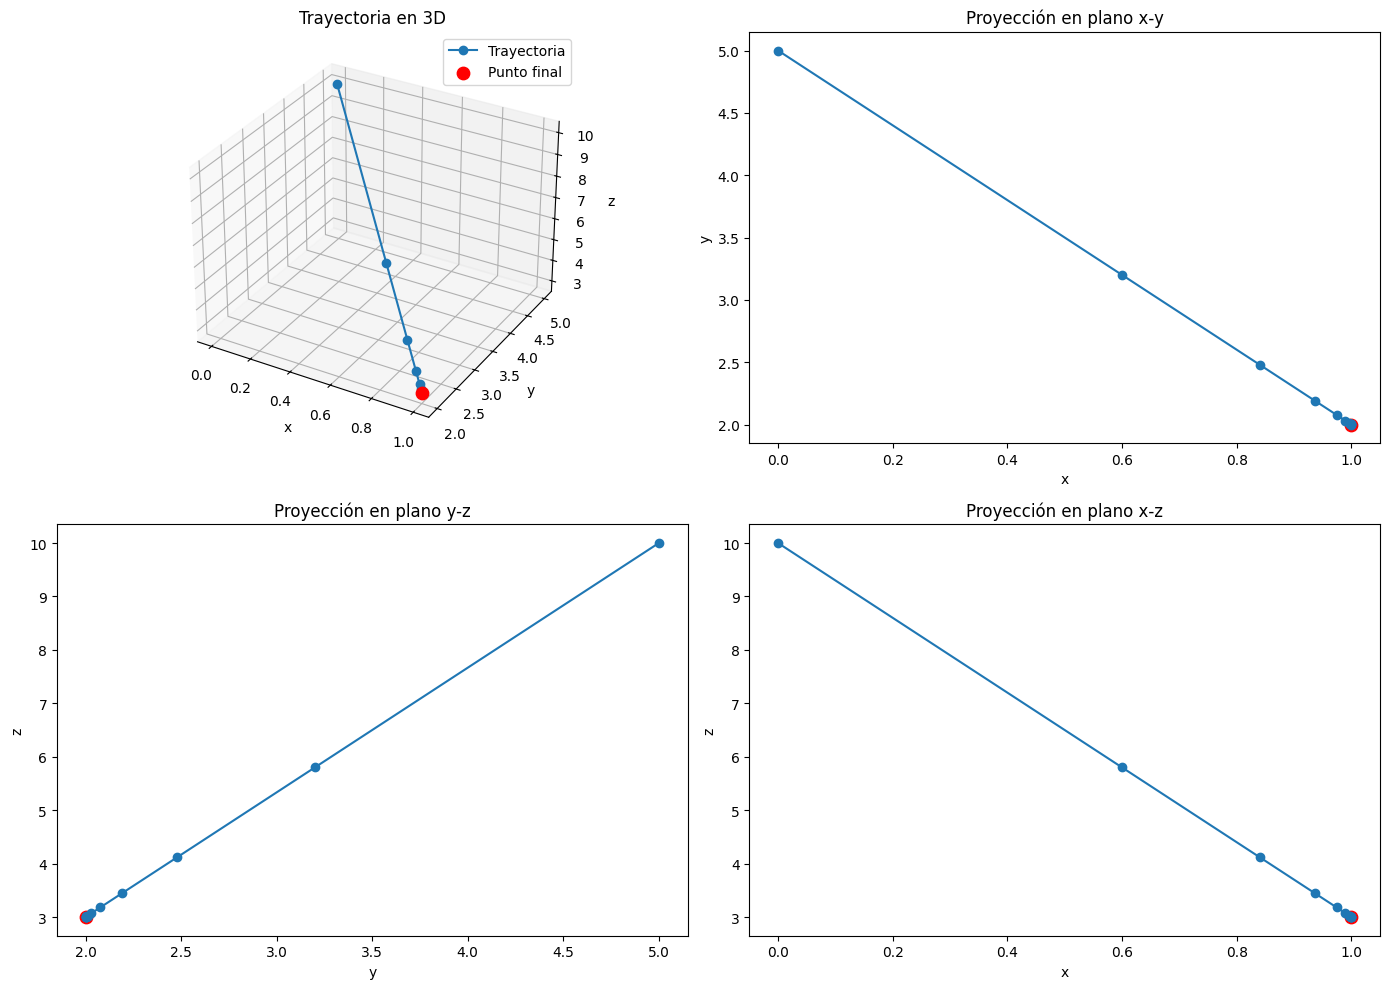


Superfiicies 3D dado X*:


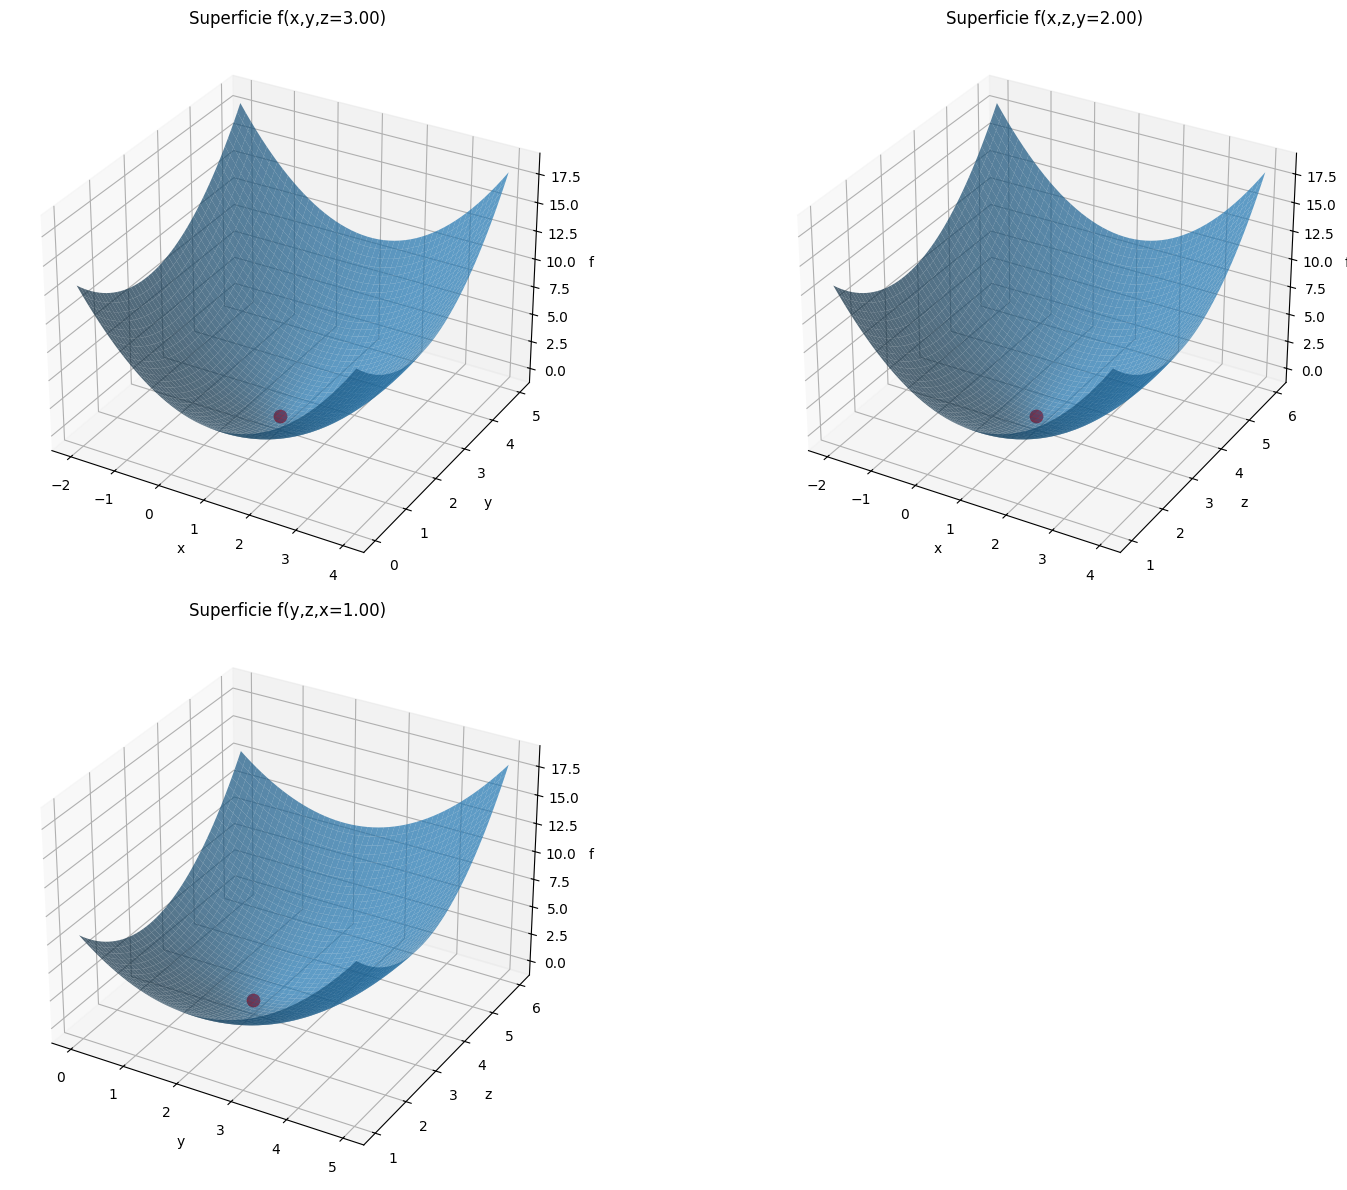


Slices 1D dado X*:


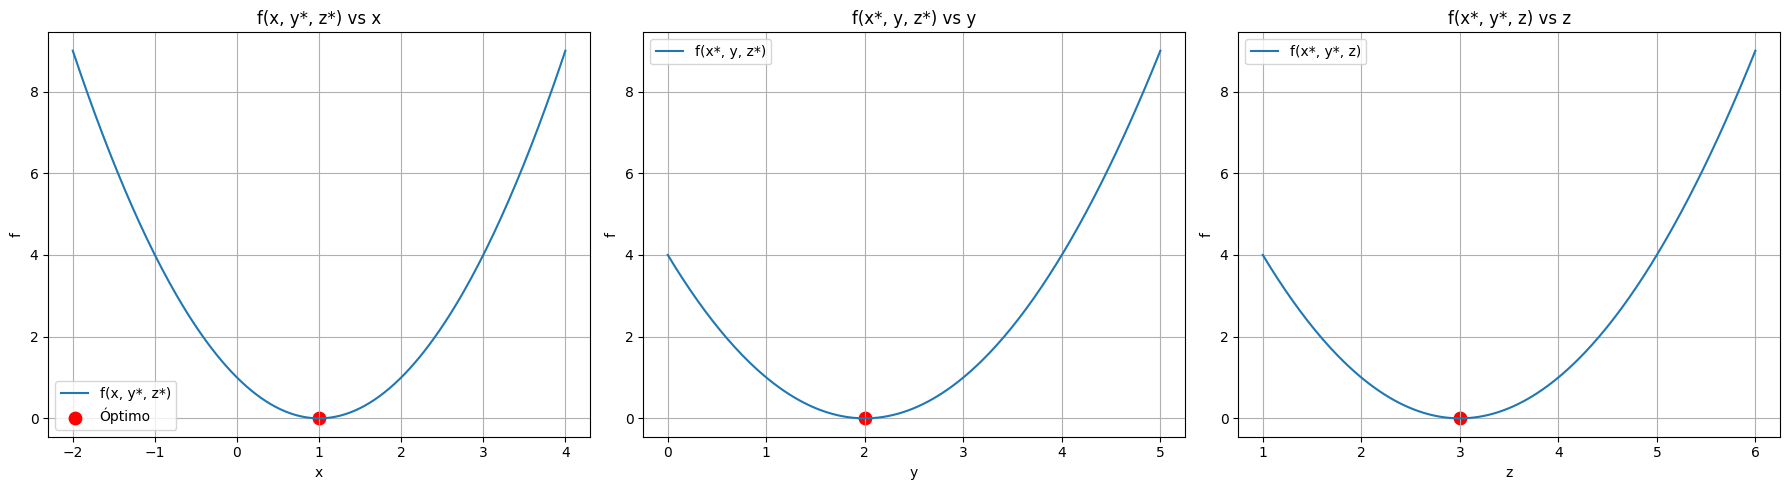


Componentes vs f(x):


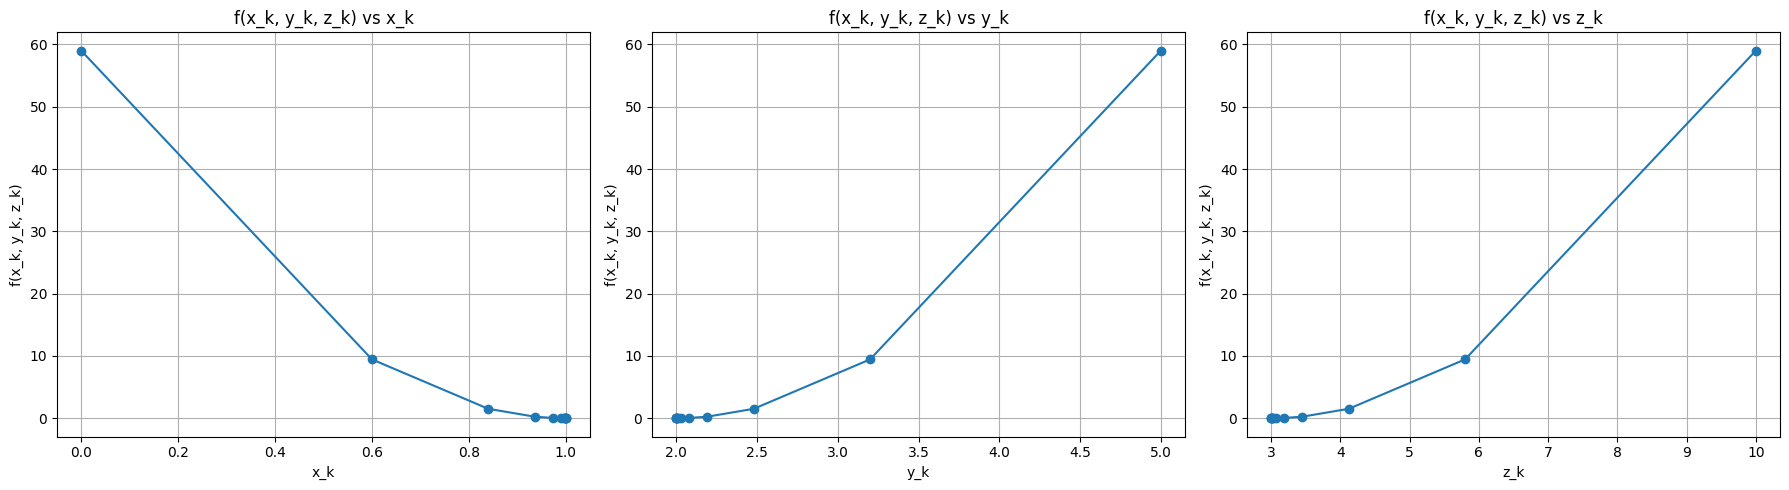

In [87]:
result = newton_raphson_nDimension(f, (x, y, z), [0, 5, 10], alpha=0.6, tol=1e-3)
print_optimization_results(result)
print("\nTrayectoria 3D y proyecion:")
plot_trajectory_3d(result['trajectory'], result['solution'])
print("\nSuperfiicies 3D dado X*:")
plot_function_3d_projections(f, (x, y, z), result['solution'], {'x': (-2,4), 'y': (0,5), 'z': (1,6)})
print("\nSlices 1D dado X*:")
plot_function_1d_slices(f, (x, y, z), result['solution'], {'x': (-2,4), 'y': (0,5), 'z': (1,6)})
print("\nComponentes vs f(x):")
plot_f_vs_components(f, (x, y, z), result['trajectory'])

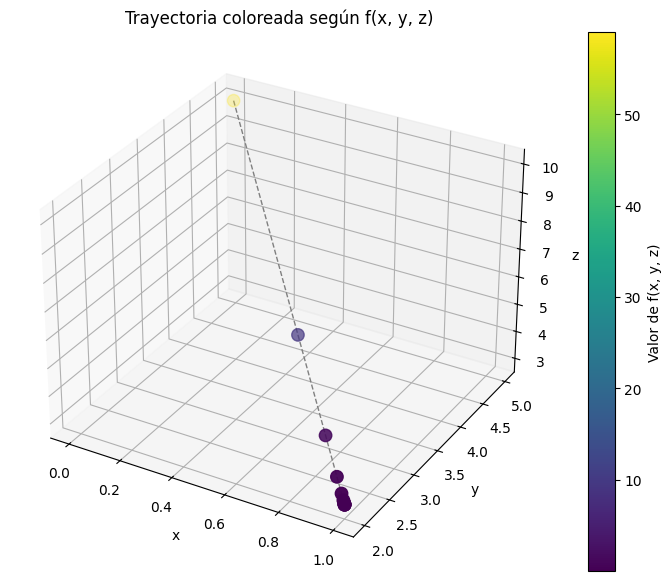

In [50]:
plot_trajectory_colored_by_f(f, (x, y, z), result["trajectory"])

C:\Users\juanm\AppData\Local\Temp\ipykernel_11196\3227881024.py:414: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 1, 0.95])


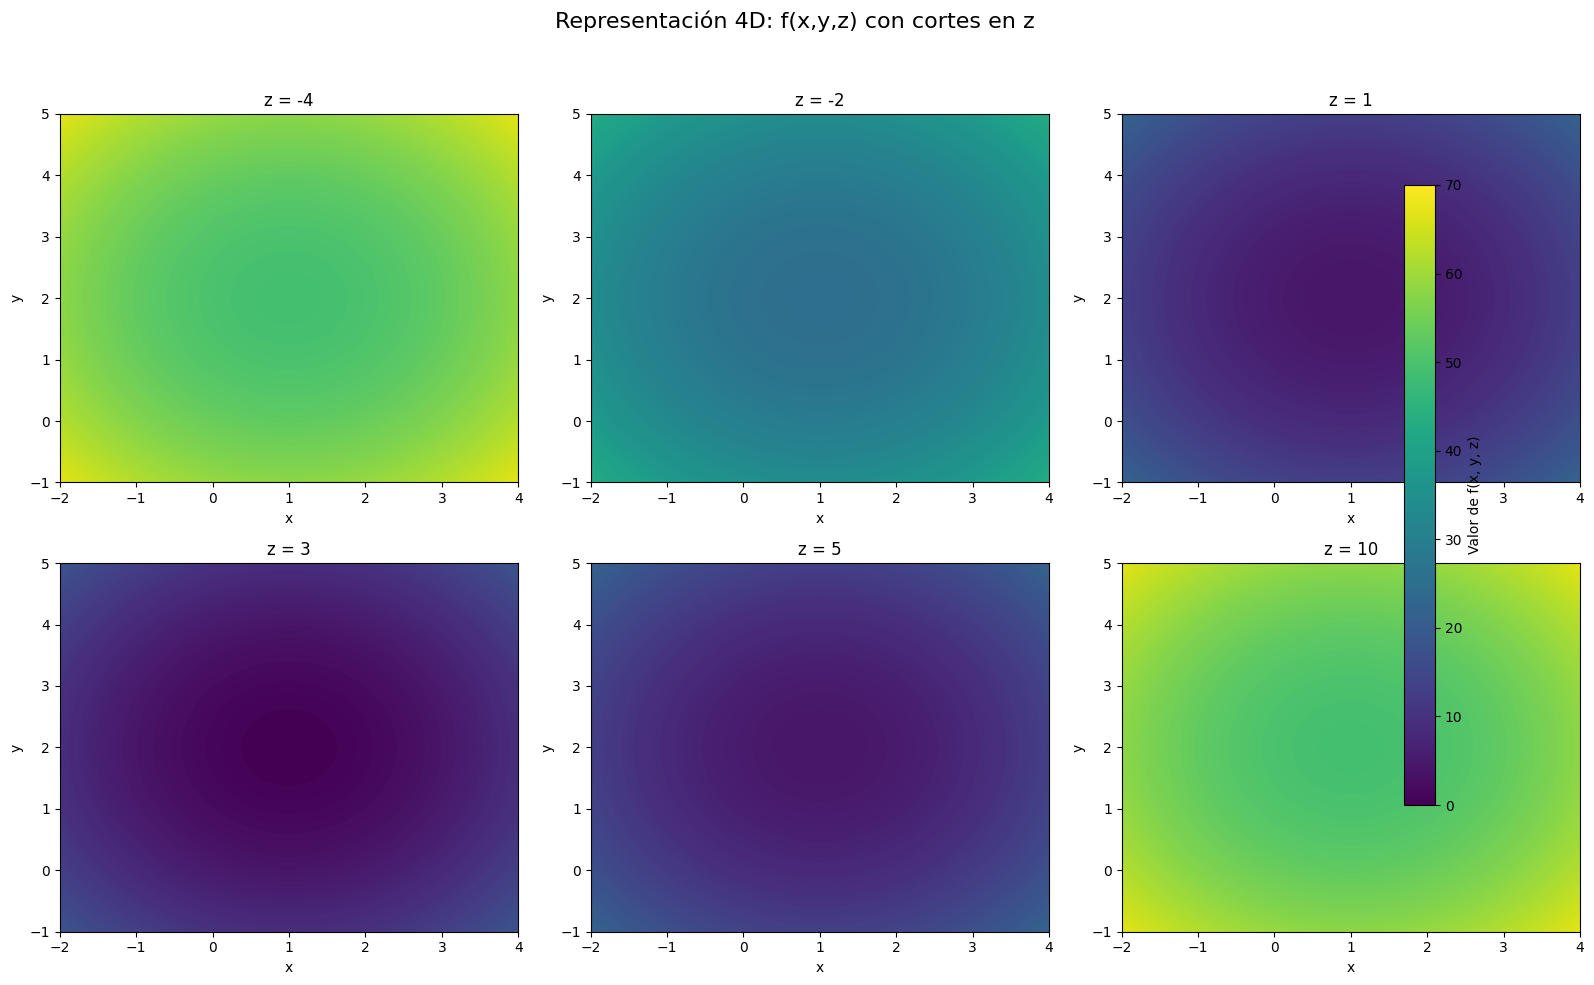

In [ ]:
z_cuts = [-4, -2, 1, 3, 5, 10]
plot_4d_surface_multiple(f_l, z_cuts, vmin=0, vmax=70)

## Interpretación de las gráficas de convergencia y comportamiento de la función

Con el objetivo de comprender de manera visual cómo evoluciona el método de Newton-Raphson en un espacio de dimensión 3 ($ \mathbb{R}^3 $), se desarrollaron diferentes tipos de gráficas que permiten analizar:

1. **La trayectoria del algoritmo en el espacio tridimensional.**
2. **El comportamiento de la función objetivo en cada plano relevante (proyecciones 2D y superficies 3D).**
3. **La influencia individual de cada componente ($x_k, y_k, z_k$) en el valor de la función durante la iteración.**


### 1. `plot_trajectory_3d(...)`: Trayectoria del método en el espacio y sus proyecciones

Este gráfico muestra cómo se desplaza el algoritmo en el espacio tridimensional desde el punto inicial hasta el punto óptimo.

- La curva en 3D representa la **trayectoria iterativa de Newton-Raphson**.
- El punto rojo indica la **solución final** encontrada.
- Se incluyen además proyecciones en los planos:
  -  Plano **X-Y** → cómo evoluciona el movimiento visto desde arriba.
  -  Plano **Y-Z** → variación entre eje vertical y profundidad.
  -  Plano **X-Z** → relación entre dirección horizontal y profundidad.

Estas proyecciones permiten comprender si alguna variable domina la convergencia o si los desplazamientos son equilibrados.
Tambien esta su versión 4d que grafica con color el valor de F(x)


### 2. `plot_function_3d_projections(...)`: Superficies de la función fijando una variable

Aquí se analiza la forma de la función objetivo alrededor del óptimo en superficies 3D de la forma:

- $ f(x, y, z^*) $ → Plano donde se fija $z = z^*$.
- $ f(x, z, y^*) $ → Plano donde se fija $y = y^*$.
- $ f(y, z, x^*) $ → Plano donde se fija $x = x^*$.

Cada superficie incluye el **punto óptimo marcado en rojo**.

Esto permite visualizar cómo la función se comporta localmente como un valle o colina respecto a cada par de variables.


### 3. `plot_function_1d_slices(...)`: Cortes unidimensionales de la función

En estas gráficas se muestran cortes en 1D:

- $ f(x, y^*, z^*) $ variando solo $x$
- $ f(x^*, y, z^*) $ variando solo $y$
- $ f(x^*, y^*, z) $ variando solo $z$

Estas curvas son útiles para observar si el algoritmo converge siguiendo direcciones de máxima pendiente en cada eje.

Sirven como evidencia de que el punto final corresponde a un mínimo o máximo local en cada dirección.

### 4. `plot_f_vs_components(...)`: Evolución de $f(x_k, y_k, z_k)$ respecto a cada variable en la trayectoria

Esta función es muy similar a la 3, pero en este caso podemos ver como evoluciona la trayectoria del algoritmo, pues se grafican las trayectorias entre puntos del algoritmo, no como tal una curva. Esto permite ver como empieza a converger el algoritmo.

### 5. `plot_4d_surface_multiple(...)`: Curvas de nivel para slides de Z

Es un intento por entender como es esta función a nivel 4D. Recogemos slides de Z y revisamos como se comprtan los valores de F en esa sección. Entendemos mejor el comportamiento de la función. 



# Problema 4: Gradiente descendente en optimización

## Parte A: Implementación de Gradiente descendente en 3-D

## Formulación matemática

### Función objetivo

Queremos minimizar la siguiente función cuadrática:

$$
L(x, y) = (x - 2)^2 + (y + 1)^2
$$

Esta función mide la "distancia al punto $(2, -1)$" en el plano.
Su forma es la de un paraboloide convexo (como un bowl), lo que garantiza que existe un único mínimo global.

### Vector de parámetros

Definimos el vector de variables o parámetros como:

$$
{\theta} =
\begin{bmatrix}
x \\
y
\end{bmatrix}
$$

El objetivo del algoritmo de gradiente descendente será encontrar el valor de ${\theta}$ que minimiza $L(x,y)$.

### Gradiente (cálculo analítico)

El gradiente indica la dirección de máximo crecimiento de la función.
Derivando parcialmente respecto a $x$ y $y$:

$$
\nabla L(x,y) =
\begin{bmatrix}
\dfrac{\partial L}{\partial x}\\
\dfrac{\partial L}{\partial y}
\end{bmatrix} =
\begin{bmatrix}
2(x - 2)\\
2(y + 1)
\end{bmatrix}
$$

En gradiente descendente nos movemos en la dirección contraria a este vector para reducir el valor de $L$.

### Matriz Hessiana (curvatura de la función)

La Hessiana describe la curvatura local de la superficie:

$$
H(L) =
\begin{bmatrix}
\dfrac{\partial^2 L}{\partial x^2} & \dfrac{\partial^2 L}{\partial x \partial y} \\
\dfrac{\partial^2 L}{\partial y \partial x} & \dfrac{\partial^2 L}{\partial y^2}
\end{bmatrix} =
\begin{bmatrix}
2 & 0 \\
0 & 2
\end{bmatrix}
= 2I_2
$$

Es una matriz simétrica y definida positiva, lo que confirma que la función es convexa.
Los autovalores son $\lambda_1 = \lambda_2 = 2$.
El mayor autovalor ($L_g = 2$) es la constante de Lipschitz del gradiente, importante para definir el rango de pasos estables en el descenso.

### Regla de actualización (Gradiente Descendente)

En cada iteración $k$, el vector de parámetros se actualiza como:

$$
{\theta}*{k+1} = {\theta}*{k} - \alpha , \nabla L({\theta}_k)
$$

donde $\alpha > 0$ es el tamaño del paso
y $\nabla L({\theta}_k)$ es el gradiente en la iteración actual.

De otra forma:

$$
x_{k+1} = x_k - \alpha \cdot 2(x_k - 2)
$$

$$
y_{k+1} = y_k - \alpha \cdot 2(y_k + 1)
$$

### Condiciones de convergencia

En funciones cuadráticas convexas, el método converge si el paso $\alpha$ cumple:

$$
0 < \alpha < \frac{2}{L_g}
$$

Dado que $L_g = 2$, se obtiene:

$$
0 < \alpha < 1
$$

Si $\alpha$ es demasiado pequeño, el algoritmo será lento.
Si $\alpha \ge 1$, la secuencia diverge (el valor de $L$ crece en lugar de decrecer).

### Solución analítica (óptimo global)

Para encontrar el mínimo exacto, igualamos el gradiente a cero:

$$
\nabla L(x, y) = 0
\Rightarrow
\begin{cases}
2(x - 2) = 0 \\
2(y + 1) = 0
\end{cases}
\Rightarrow
x^\star = 2,\quad y^\star = -1
$$

El valor mínimo de la función es:

$$
L(2, -1) = 0
$$

Este es el punto al que debería converger el algoritmo.

### Criterios de parada (para detener el algoritmo)

El proceso iterativo debe detenerse cuando se cumpla alguna de las siguientes condiciones:

Gradiente pequeño:
$$
|\nabla L(\boldsymbol{\theta}_k)|_2 < \text{tol}
$$
(la función está cerca de un mínimo).

Cambio pequeño entre iteraciones:
$$
|\boldsymbol{\theta}_{k+1} - \boldsymbol{\theta}_k|_2 < \text{tol}
$$
(ya no hay progreso significativo).

Límite de iteraciones:
$$
k \ge k_{\max}
$$
(para evitar ciclos infinitos).

## Cálculo analítico del gradiente


A continuación calculamos analíticamente el gradiente de la función de pérdida con ayuda de `sympy`, corroborando los cálculos hechos anteriormente.

In [6]:
# definir variables simbólicas
x, y = sp.symbols('x y')

# definir la función de pérdida
L = (x - 2)**2 + (y + 1)**2

# calcular derivadas parciales
dL_dx = sp.diff(L, x)
dL_dy = sp.diff(L, y)

# construir el vector gradiente
grad_L = sp.Matrix([dL_dx, dL_dy])

# mostrar resultados
print("Función de pérdida L(x, y):")
display(L)

print("Gradiente de L(x, y):")
display(grad_L)


Función de pérdida L(x, y):


(x - 2)**2 + (y + 1)**2

Gradiente ∇L(x, y):


Matrix([
[2*x - 4],
[2*y + 2]])

## Implementación del algoritmo de gradiente descendente y trayectorias

A continuación, se presenta el código que implementa el algoritmo de gradiente descendente para minimizar la función cuadrática $(L(x, y) = (x - 2)^2 + (y + 1)^2)$. Primero, se define la función de pérdida y su gradiente analítico, que indica la dirección de mayor crecimiento de $L$. Luego, a partir de un punto inicial ($(-3, 4)$), el algoritmo actualiza los valores de $x$ y $y$ en dirección opuesta al gradiente, con una magnitud controlada por el parámetro de paso ($\alpha$). Se realizan múltiples ejecuciones del proceso para diferentes valores de ($\alpha$), registrando la trayectoria de los parámetros en el plano. 

Finalmente, graficamos la función y ponemos las trayectorias seguidas por el gradiente descendente para cada valor de $\alpha$, junto con el punto óptimo analítico ($(2, -1)$).

α = 0.05
  Iteraciones: 100
  Punto final: (x, y) = (1.999867193005562, -0.999867193005562)
  L(x, y) final = 3.52753955432896e-08
  Error respecto al óptimo = 0.0001878174527121737

α = 0.1
  Iteraciones: 64
  Punto final: (x, y) = (1.9999968614491324, -0.9999968614491324)
  L(x, y) final = 1.9701003097564248e-11
  Error respecto al óptimo = 4.4385812032184615e-06

α = 0.4
  Iteraciones: 10
  Punto final: (x, y) = (1.999999488, -0.999999488)
  L(x, y) final = 5.242879999028233e-13
  Error respecto al óptimo = 7.240773438679208e-07

α = 0.8
  Iteraciones: 32
  Punto final: (x, y) = (1.9999996020669444, -0.9999996020669444)
  L(x, y) final = 3.1670143350708814e-13
  Error respecto al óptimo = 5.627623241716596e-07



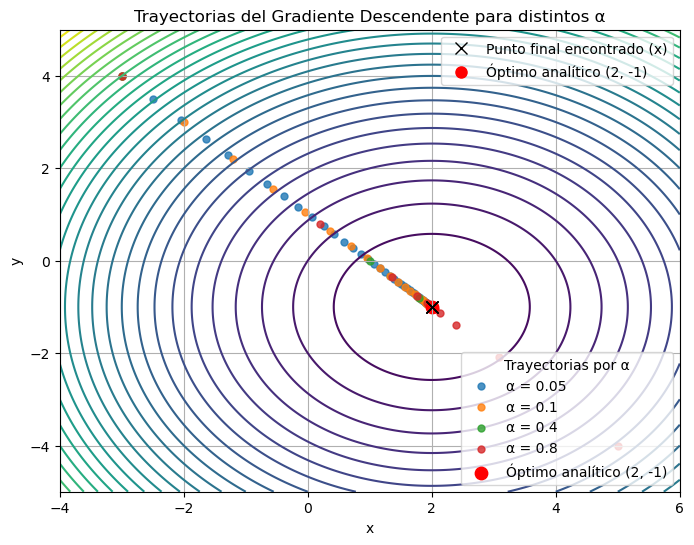

In [11]:
# definición de la función de pérdida y su gradiente
def L(x, y):
    return (x - 2)**2 + (y + 1)**2

def grad_L(x, y):
    # Gradiente analítico: grad L(x, y) = [2(x-2), 2(y+1)]
    dL_dx = 2 * (x - 2)
    dL_dy = 2 * (y + 1)
    return np.array([dL_dx, dL_dy])

# parametros iniciales
theta0 = np.array([-3.0, 4.0])   # punto inicial random
max_iter = 100
tol = 1e-6 # gradiente pequeño

# Valores de alfa  para comparar
alphas = [0.05, 0.1, 0.4, 0.8]

# Punto óptimo analítico
theta_star = np.array([2.0, -1.0])

# c reamos figura
fig, ax = plt.subplots(figsize=(8, 6))

# contorno de la función
x_vals = np.linspace(-4, 6, 200)
y_vals = np.linspace(-5, 5, 200)
X, Y = np.meshgrid(x_vals, y_vals)
Z = L(X, Y)
ax.contour(X, Y, Z, levels=30, cmap="viridis")

# ejecutar gradiente descendente para cada alfa
for alpha in alphas:
    theta = theta0.copy()
    trayectoria = [theta.copy()]
    
    for k in range(max_iter):
        grad = grad_L(theta[0], theta[1])
        new_theta = theta - alpha * grad
        
        # criterio de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break
        
        theta = new_theta
        trayectoria.append(theta.copy())
    
    trayectoria = np.array(trayectoria)
    
    # graficamos trayectoria 
    ax.scatter(trayectoria[:, 0], trayectoria[:, 1], s=25, label=f'α = {alpha}', alpha=0.8)
    ax.plot(trayectoria[-1, 0], trayectoria[-1, 1], 'x', color='black', markersize=8)

    # Calcular y mostrar resultados finales
    L_final = L(theta[0], theta[1])
    error = np.linalg.norm(theta - theta_star)
    print(f"α = {alpha}")
    print(f"  Iteraciones: {len(trayectoria)-1}")
    print(f"  Punto final: (x, y) = ({theta[0]}, {theta[1]})")
    print(f"  L(x, y) final = {L_final}")
    print(f"  Error respecto al óptimo = {error}\n")
    
# Marcar el punto óptimo analítico
ax.scatter(theta_star[0], theta_star[1], color='red', s=80, label='Óptimo analítico (2, -1)')

# labels
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trayectorias del Gradiente Descendente para distintos α')
ax.legend()
plt.grid(True)

# Leyenda personalizada
custom_legend = [
    plt.Line2D([0], [0], color='black', marker='x', linestyle='', markersize=8, label='Punto final encontrado (x)'),
    plt.Line2D([0], [0], color='red', marker='o', linestyle='', markersize=8, label='Óptimo analítico (2, -1)'),
]
first_legend = ax.legend(handles=custom_legend, loc='upper right')
ax.add_artist(first_legend)
ax.legend(loc='lower right', title='Trayectorias por α')

plt.show()

En la gráfica se pueden ver los contornos de la función de pérdida y los puntos generados por el algoritmo de gradiente descendente para distintos valores de la tasa de aprendizaje $\alpha$ (se omite una línea que una los puntos para evitar superposiciones, sin embargo la trayectoria es evidente). Cada conjunto de puntos representa la trayectoria de actualización de los parámetros desde la posición inicial hacia el mínimo. Las X negras indican el punto final alcanzado por el algoritmo en cada caso, mientras que el círculo rojo marca el óptimo analítico ($(2, -1)$). 

Al variar el parámetro de paso $\alpha$, la velocidad y estabilidad de la convergencia cambian significativamente. Los valores pequeños garantizan una convergencia lenta pero estable, mientras que los valores grandes, aunque aceleran el proceso, pueden causar inestabilidad u oscilaciones si exceden el límite óptimo.

## Comparación con la solución analítica.

Los resultados obtenidos muestran que el algoritmo de gradiente descendente converge de manera muy precisa hacia la solución óptima analítica ($(x^\star, y^\star) = (2, -1)$) para todos los valores de $\alpha$ utilizados, aunque con diferentes velocidades. Para $\alpha = 0.05$, la convergencia es estable pero más lenta, alcanzando un error del orden de $10^{-4}$ tras 100 iteraciones. Al aumentar el paso a $\alpha = 0.1$, el algoritmo requiere menos iteraciones (64) y logra un error mucho menor. Con $\alpha = 0.4$, la convergencia se vuelve aún más rápida, alcanzando prácticamente el valor óptimo en solo 10 iteraciones, con un error de $7\times10^{-7}$. Incluso con $\alpha = 0.8$, que está cerca del límite teórico de estabilidad, el método sigue siendo preciso y converge en 32 iteraciones, con un error pequeño.

## Análisis la sensibilidad a $\alpha$ y estrategias para su elección óptima

El método de gradiente descendente es muy sensible al valor de la tasa de aprendizaje $\alpha$, ya que este parámetro controla el tamaño de los pasos que da el algoritmo hacia el mínimo. Si $\alpha$ es demasiado pequeño, el descenso es muy lento y necesita muchas iteraciones para acercarse al punto óptimo. Si, por el contrario, $\alpha$ es muy grande, el algoritmo puede oscilar alrededor del mínimo o incluso divergir, alejándose en lugar de acercarse. En este problema, se observó que valores intermedios como $\alpha = 0.4$ ofrecieron el mejor equilibrio entre rapidez y estabilidad, mientras que valores más pequeños tardaron más y valores cercanos al límite (como $\alpha = 0.8)$ fueron menos estables. 

En general, para elegir un buen $\alpha$, se recomienda empezar con un valor pequeño e ir aumentándolo gradualmente mientras la función de pérdida siga disminuyendo. De igual modo, para gradiente descendente con paso fijo existe un paso "óptimo" teórico que minimiza el factor de contracción lineal: $\alpha_{\text{opt}} = \dfrac{2}{\lambda_{\max}+\lambda_{\min}}$, y la tasa de convergencia depende del número de condición $\kappa=\lambda_{\max}/\lambda_{\min}$ (mejor cuando ($\kappa$ cercano a 1)*. En este problema $\lambda_{\min}=\lambda_{\max}=2$, de modo que $\alpha_{\text{opt}}=0.5$, lo que explica por qué valores intermedios como 0.4 dieron rápida convergencia sin inestabilidad. 

\* Optimization Bootcamp: Gradient Descent, https://faculty.washington.edu/sbrunton/OptimizationBootcamp.pdf, página 49.
  

## Parte B: Comparación entre Newton-Raphson y Gradiente Descendente


## Formulación matemática

De igual forma que hicimos la formulación matemática del punto A, ahora presentamos la formulación de la parte B:

### Función objetivo (a minimizar) 

$$
f(x,y) = (x-2)^2 (y+2)^2 + (x+1)^2 + (y-1)^2,\qquad (x_0,y_0)=(-2,-3)
$$

### Vector de parámetros:

$$
{\theta}=\begin{bmatrix} x \\ y \end{bmatrix}
$$

### Gradiente (cálculo analítico):

El gradiente de la función, que indica la dirección de máximo aumento del valor de la función.
$$
\nabla f(x,y)=
\begin{bmatrix}
\displaystyle \frac{\partial f}{\partial x} \\
\displaystyle \frac{\partial f}{\partial y}
\end{bmatrix}=
\begin{bmatrix}
2(x-2)(y+2)^2 + 2(x+1) \\
2(y+2)(x-2)^2 + 2(y-1)
\end{bmatrix}
$$

(Alternativamente, expandiendo los polinomios:)

$$
\nabla f(x,y)=
\begin{bmatrix}
2x y^{2} + 8 x y + 10 x - 4 y^{2} - 16 y - 14 \\
2 x^{2} y + 4 x^{2} - 8 x y - 16 x + 10 y + 14
\end{bmatrix}.
$$

Matriz Hessiana (componentes de segunda derivada):

$$
H_f(x,y)=
\begin{bmatrix}
\dfrac{\partial^2 f}{\partial x^2} & \dfrac{\partial^2 f}{\partial x\partial y} \\
\dfrac{\partial^2 f}{\partial y\partial x} & \dfrac{\partial^2 f}{\partial y^2}
\end{bmatrix}=
\begin{bmatrix}
2(y+2)^2 + 2 & 4(x-2)(y+2) \\
4(x-2)(y+2) & 2(x-2)^2 + 2
\end{bmatrix}.
$$

Esta función presenta una curvatura variable debido al término $(x-2)^2(y+2)^2$, lo que provoca que la superficie tenga regiones más pronunciadas y otras más planas. La Hessiana depende de los valores de $x$ y $y$, de modo que la forma de la superficie cambia con la posición en el plano. En el punto inicial $(x_0, y_0)=(-2,-3)$, la matriz Hessiana es invertible, pero su signo puede variar en otras zonas, lo que hace que no siempre sea definida positiva. Esto implica que el método de Newton puede no seguir una dirección estrictamente de descenso en toda la región, afectando su estabilidad dependiendo de la elección del paso.

### Reglas de actualización (algoritmos a comparar)

* **Gradiente Descendente:**

$$
{\theta}_{k+1} = {\theta}_k - \alpha,\nabla f({\theta}_k).
$$

* **Newton–Raphson:**

$$
{\theta}_{k+1} = {\theta}_k - \alpha, H_f({\theta}_k)^{-1},\nabla f({\theta}_k),
$$

siempre que $H_f(\boldsymbol{\theta}_k)$ sea invertible. 

### Criterios de parada

Los criterios de parada para ambos métodos se basan en medir cuándo el algoritmo deja de hacer progresos significativos. Se detiene cuando la norma del gradiente $|\nabla f({\theta}_k)|*2$ o el cambio entre iteraciones $|{\theta}*{k+1}-{\theta}_k|_2$ son menores que una tolerancia predefinida, o cuando se alcanza un número máximo de iteraciones.

## Cálculo analítico del gradiente y la matriz Hessiana

A continuación se calcula simbólicamente el gradiente y la Hessiana de la función, y se muestran los valores en el punto inicial.

In [12]:
# definimos symbols
x, y = sp.symbols('x y')

# definimos funcion 
f = (x - 2)**2 * (y + 2)**2 + (x + 1)**2 + (y - 1)**2

# gradiente simbólico
grad_f = sp.Matrix([sp.diff(f, x), sp.diff(f, y)])
grad_f_simpl = sp.simplify(grad_f)

# Hessian simbólico
H_f = sp.hessian(f, (x, y))
H_f_simpl = sp.simplify(H_f)

# resultados
print("Función simbólica f(x, y):")
display(f)

print("\nGradiente simbólico ∇f(x, y):")
display(grad_f_simpl)

print("\nHessiana simbólica H_f(x, y):")
display(H_f_simpl)

# creamos funciones callable
grad_np = sp.lambdify((x, y), grad_f_simpl, modules='numpy')
hess_np = sp.lambdify((x, y), H_f_simpl, modules='numpy')
f_np = sp.lambdify((x, y), f, modules='numpy')

# evaluamos  en (-2, -3)
x0, y0 = -2.0, -3.0
grad_at_init = np.array(grad_np(x0, y0), dtype=float).reshape(-1)
hess_at_init = np.array(hess_np(x0, y0), dtype=float)

print(f"\nEvaluación numérica en el punto inicial (x0, y0) = ({x0}, {y0}):")
print("Gradiente en el punto inicial:")
print(grad_at_init)

print("\nHessiana en el punto inicial:")
print(hess_at_init)

# calculamos condición de número punto inicial, para revisar si la función es invertible
try:
    cond_hess = np.linalg.cond(hess_at_init)
except Exception as e:
    cond_hess = np.inf

print(f"\nNúmero de condición de la Hessiana en el punto inicial: {cond_hess}")

# Also show the value of the function at the initial point
f_at_init = float(f_np(x0, y0))
print(f"\nValor de f en el punto inicial: {f_at_init:.6e}")

# devolvemos el gradiente la hesiana y la función callable
grad_np, hess_np, f_np

Función simbólica f(x, y):


(x - 2)**2*(y + 2)**2 + (x + 1)**2 + (y - 1)**2


Gradiente simbólico ∇f(x, y):


Matrix([
[2*x + 2*(x - 2)*(y + 2)**2 + 2],
[2*y + 2*(x - 2)**2*(y + 2) - 2]])


Hessiana simbólica H_f(x, y):


Matrix([
[ 2*(y + 2)**2 + 2, 4*(x - 2)*(y + 2)],
[4*(x - 2)*(y + 2),  2*(x - 2)**2 + 2]])


Evaluación numérica en el punto inicial (x0, y0) = (-2.0, -3.0):
Gradiente en el punto inicial:
[-10. -40.]

Hessiana en el punto inicial:
[[ 4. 16.]
 [16. 34.]]

Número de condición de la Hessiana en el punto inicial: 13.961708863162738

Valor de f en el punto inicial: 3.300000e+01


(<function _lambdifygenerated(x, y)>,
 <function _lambdifygenerated(x, y)>,
 <function _lambdifygenerated(x, y)>)

## Implementación algoritmos, resultados y visualización

Este código implementa y compara los métodos de gradiente Descendente y Newton–Raphson para encontrar el mínimo de la función $ f(x, y) = (x-2)^2 (y+2)^2 + (x+1)^2 + (y-1)^2 $, partiendo del punto inicial $(-2, -3)$. Para ambos métodos se prueban distintos valores del parámetro de paso $\alpha$, y se miden el número de iteraciones hasta la convergencia, el tiempo de ejecución, el error respecto al óptimo teórico y el valor final de la función. El código también genera una visualización gráfica donde se muestra el mapa de contornos de la función junto con las trayectorias de los algoritmos, marcando el punto inicial y el punto óptimo. Asimismo, se grafica la convergencia del error en escala logarítmica para ambos métodos y se presentan tablas con los resultados numéricos, permitiendo comparar la velocidad, precisión y robustez de cada enfoque frente a diferentes valores del parámetro de paso.


==== GRADIENTE DESCENDENTE ====

α = 0.01 | Iteraciones: 200 | Tiempo: 0.00500s | Error: 2.775e+00 | f(x,y): 8.004e+00
α = 0.05 | Iteraciones: 169 | Tiempo: 0.00400s | Error: 2.690e+00 | f(x,y): 8.000e+00
α = 0.10 | Iteraciones:  10 | Tiempo: 0.00000s | Error: 1.232e+00 | f(x,y): 8.552e+00
α = 0.40 | Iteraciones: 200 | Tiempo: 0.00800s | Error: nan | f(x,y): nan
α = 0.80 | Iteraciones: 200 | Tiempo: 0.01200s | Error: nan | f(x,y): nan

==== NEWTON–RAPHSON ====

α = 0.01 | Iteraciones: 200 | Tiempo: 0.01300s | Error: 5.162e+01 | f(x,y): 1.649e+06
α = 0.05 | Iteraciones: 200 | Tiempo: 0.01100s | Error: 2.690e+00 | f(x,y): 8.000e+00
α = 0.10 | Iteraciones: 131 | Tiempo: 0.00900s | Error: 2.690e+00 | f(x,y): 8.000e+00
α = 0.40 | Iteraciones:  31 | Tiempo: 0.00100s | Error: 1.232e+00 | f(x,y): 8.552e+00
α = 0.80 | Iteraciones:  26 | Tiempo: 0.00200s | Error: 1.232e+00 | f(x,y): 8.552e+00


<lambdifygenerated-1>:2: RuntimeWarning: overflow encountered in scalar multiply
  return array([[2*x + 2*(x - 2)*(y + 2)**2 + 2], [2*y + 2*(x - 2)**2*(y + 2) - 2]])
C:\Users\mauri\AppData\Local\Temp\ipykernel_9428\1490059766.py:32: RuntimeWarning: invalid value encountered in subtract
  new_theta = theta - alpha * grad
<lambdifygenerated-1>:2: RuntimeWarning: overflow encountered in scalar power
  return array([[2*x + 2*(x - 2)*(y + 2)**2 + 2], [2*y + 2*(x - 2)**2*(y + 2) - 2]])


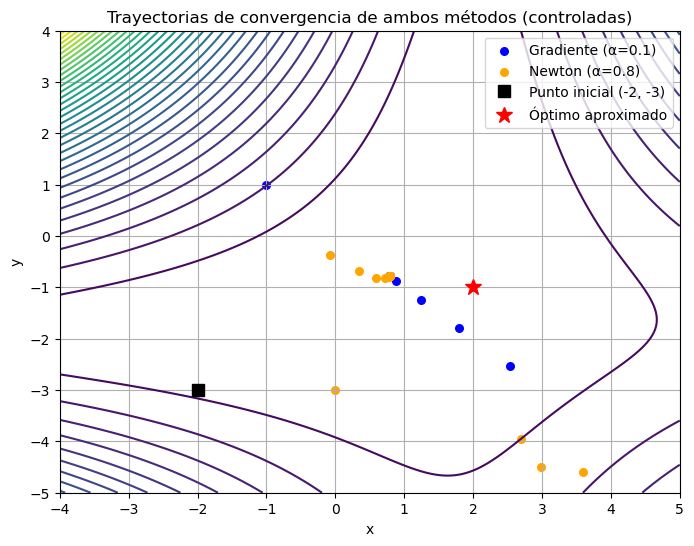

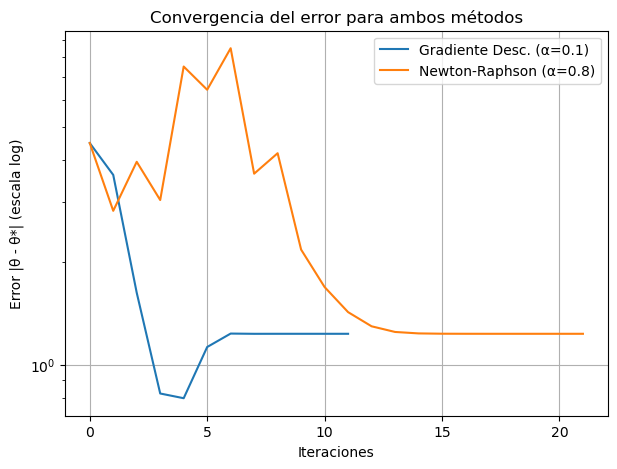


=== Resultados: Gradiente Descendente ===


α  Iteraciones  Tiempo (s)  Error final  f(x,y) final
0  0.01          200    0.004997     2.775278      8.004431
1  0.05          169    0.004000     2.690010      8.000000
2  0.10           10    0.000000     1.232036      8.551663
3  0.40          200    0.008004          NaN           NaN
4  0.80          200    0.011996          NaN           NaN


=== Resultados: Newton–Raphson ===


α  Iteraciones  Tiempo (s)  Error final  f(x,y) final
0  0.01          200    0.012999    51.616947  1.649149e+06
1  0.05          200    0.010998     2.689893  8.000000e+00
2  0.10          131    0.008998     2.689985  8.000000e+00
3  0.40           31    0.001001     1.232037  8.551663e+00
4  0.80           26    0.002002     1.232035  8.551663e+00

In [15]:
# Punto inicial
x0, y0 = -2.0, -3.0
thetas_init = np.array([x0, y0])

# Parámetros de parada y prueba
tol = 1e-6             # tolerancia para detener el algoritmo
max_iter = 200         # máximo de iteraciones permitidas
alphas = [0.01, 0.05, 0.1, 0.4, 0.8]  # distintos valores de paso α

# Óptimo analítico aproximado (para medir error)
theta_star = np.array([2.0, -1.0])

# Función auxiliar: distancia al óptimo (norma Euclidiana)
def error_norm(theta):
    return np.linalg.norm(theta - theta_star)


print("==== GRADIENTE DESCENDENTE ====\n")
gd_results = []  # lista para guardar resultados

for alpha in alphas:
    # Inicializar parámetros
    theta = thetas_init.copy()
    start_time = time.time()  # medir tiempo de ejecución
    trayectoria = [theta.copy()]  # almacenar trayectoria de puntos
    
    # Iteraciones del método
    for k in range(max_iter):
        grad = np.array(grad_np(theta[0], theta[1]), dtype=float).reshape(-1)
        
        # Regla de actualización: θ_{k+1} = θ_k - α ∇f(θ_k)
        new_theta = theta - alpha * grad
        trayectoria.append(new_theta.copy())
        
        # Criterio de parada (cuando el cambio es muy pequeño)
        if np.linalg.norm(new_theta - theta) < tol:
            break
        
        # Actualizar parámetro
        theta = new_theta
    
    end_time = time.time()
    
    # Evaluar resultados finales
    err = error_norm(theta)                # error respecto al óptimo
    tiempo = end_time - start_time         # tiempo total
    L_final = f_np(theta[0], theta[1])     # valor final de la función
    
    # Guardar resultados
    gd_results.append((alpha, k+1, tiempo, err, L_final))
    
    # Mostrar resultados en consola
    print(f"α = {alpha:.2f} | Iteraciones: {k+1:3d} | "
          f"Tiempo: {tiempo:.5f}s | Error: {err:.3e} | f(x,y): {L_final:.3e}")


#  NEWTON–RAPHSON

print("\n==== NEWTON–RAPHSON ====\n")
newton_results = []  # lista para guardar resultados

for alpha in alphas:
    # Inicializar parámetros
    theta = thetas_init.copy()
    start_time = time.time()
    trayectoria_N = [theta.copy()]
    
    # Iteraciones del método de Newton
    for k in range(max_iter):
        grad = np.array(grad_np(theta[0], theta[1]), dtype=float).reshape(-1)
        H = np.array(hess_np(theta[0], theta[1]), dtype=float)
        
        # Resolver el sistema H * step = grad  ->  step = H^{-1} * grad
        try:
            step = np.linalg.solve(H, grad)
        except np.linalg.LinAlgError:
            # Si la Hessiana no se puede invertir, se detiene el proceso
            print(f"α={alpha}: Hessiana no invertible en iteración {k}")
            break
        
        # Regla de actualización: θ_{k+1} = θ_k - α * H^{-1}∇f(θ_k)
        new_theta = theta - alpha * step
        trayectoria_N.append(new_theta.copy())
        
        # Criterio de parada
        if np.linalg.norm(new_theta - theta) < tol:
            break
        
        # Actualizar
        theta = new_theta
    
    end_time = time.time()
    
    # Evaluar resultados finales
    err = error_norm(theta)
    tiempo = end_time - start_time
    L_final = f_np(theta[0], theta[1])
    
    # Guardar resultados
    newton_results.append((alpha, k+1, tiempo, err, L_final))
    
    # Mostrar resultados en consola
    print(f"α = {alpha:.2f} | Iteraciones: {k+1:3d} | "
          f"Tiempo: {tiempo:.5f}s | Error: {err:.3e} | f(x,y): {L_final:.3e}")



# VISUALIZACIÓN 

fig, ax = plt.subplots(figsize=(8, 6))

# Crear mapa de contornos centrado en la región del óptimo
x_vals = np.linspace(-4, 5, 300)
y_vals = np.linspace(-5, 4, 300)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f_np(X, Y)
ax.contour(X, Y, Z, levels=40, cmap="viridis")

# Función auxiliar: trayectoria con control de paso
def get_traj(method, alpha, max_step=5):
    theta = thetas_init.copy()
    trayectoria = [theta.copy()]
    for _ in range(max_iter):
        grad = np.array(grad_np(theta[0], theta[1]), dtype=float).reshape(-1)
        if method == 'gd':
            step = alpha * grad
        else:  # método de Newton
            H = np.array(hess_np(theta[0], theta[1]), dtype=float)
            try:
                step = np.linalg.solve(H, grad)
            except np.linalg.LinAlgError:
                break
            step *= alpha

        # Limitamos el tamaño del paso para evitar saltos muy grandes
        if np.linalg.norm(step) > max_step:
            step = step * (max_step / np.linalg.norm(step))

        new_theta = theta - step
        trayectoria.append(new_theta.copy())

        if np.linalg.norm(new_theta - theta) < tol:
            break
        theta = new_theta
    return np.array(trayectoria)

# Volver a calcular trayectorias usando los mejores α
traj_gd = get_traj('gd', alpha_gd_opt)
traj_nt = get_traj('nt', alpha_nt_opt)

# Graficar trayectorias
ax.scatter(traj_gd[:,0], traj_gd[:,1], s=30, color='blue', label=f'Gradiente (α={alpha_gd_opt})')
ax.scatter(traj_nt[:,0], traj_nt[:,1], s=30, color='orange', label=f'Newton (α={alpha_nt_opt})')

# Marcar punto inicial y óptimo
ax.plot(x0, y0, 'ks', markersize=8, label='Punto inicial (-2, -3)')
ax.plot(theta_star[0], theta_star[1], 'r*', markersize=12, label='Óptimo aproximado')

# Mejorar presentación del gráfico
ax.set_xlim(-4, 5)
ax.set_ylim(-5, 4)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_title('Trayectorias de convergencia de ambos métodos (controladas)')
ax.legend()
ax.grid(True)
plt.show()



# CONVERGENCIA DEL ERROR (ESCALA LOGARÍTMICA)

fig, ax = plt.subplots(figsize=(7, 5))

# Función auxiliar: curva de error por iteración
def error_curve(traj):
    return [np.linalg.norm(t - theta_star) for t in traj]

# Calcular errores
err_gd = error_curve(traj_gd)
err_nt = error_curve(traj_nt)

# Gráfico en escala logarítmica
ax.semilogy(err_gd, label=f'Gradiente Desc. (α={alpha_gd_opt})')
ax.semilogy(err_nt, label=f'Newton-Raphson (α={alpha_nt_opt})')

ax.set_xlabel('Iteraciones')
ax.set_ylabel('Error |θ - θ*| (escala log)')
ax.set_title('Convergencia del error para ambos métodos')
ax.legend()
ax.grid(True)
plt.show()



# TABLA DE RESULTADOS FINALES


cols = ["α", "Iteraciones", "Tiempo (s)", "Error final", "f(x,y) final"]
df_gd = pd.DataFrame(gd_results, columns=cols)
df_nt = pd.DataFrame(newton_results, columns=cols)

print("\n=== Resultados: Gradiente Descendente ===")
display(df_gd)

print("\n=== Resultados: Newton–Raphson ===")
display(df_nt)


## Análisis comparativo:
En este problema, el método de gradiente descendente mostró un comportamiento más estable y robusto frente a cambios en el parámetro de paso $\alpha$, aunque necesitó un mayor número de iteraciones para acercarse al mínimo. Con valores pequeños de $\alpha$ (0.01–0.05) el avance fue lento pero seguro, mientras que con pasos mayores (0.4–0.8) la función se volvió inestable y los valores numéricos divergieron, produciendo errores tipo *NaN*. Su tiempo de ejecución fue ligeramente mayor, pero constante, y su precisión final fue moderada, con errores residuales cercanos a 1.2 en el mejor caso. En contraste, el método de Newton–Raphson logró converger en menos iteraciones (alrededor de 30) cuando el paso fue adecuado, mostrando una reducción drástica del error en pocas actualizaciones. Sin embargo, su desempeño fue mucho más sensible al valor de $\alpha$. Pasos demasiado pequeños o grandes provocaron divergencia o saltos fuera del valle de la función. Además, cada iteración implicó un mayor costo computacional por el cálculo e inversión de la Hessiana, lo que lo hace más exigente en tiempo de cómputo individual aunque converja más rápido en número de pasos.

## Tabla comparativa

| Método                    | Iteraciones típicas | Tiempo de ejecución |    Precisión final    |                 Robustez al paso α                 |   Costo computacional por iteración  | Ventajas principales                 | Desventajas principales                              |
| :------------------------ | :-----------------: | :-----------------: | :-------------------: | :------------------------------------------------: | :----------------------------------: | :----------------------------------- | :--------------------------------------------------- |
| **Gradiente Descendente** |        10–200       |         Bajo        |        Moderada       |         Alta (solo falla con pasos grandes)        |                 Bajo                 | Estable, fácil de implementar        | Convergencia lenta, sensible a curvaturas            |
| **Newton–Raphson**        |        26–31        |       Muy bajo      | Alta cerca del óptimo | Baja (puede divergir con pasos pequeños o grandes) | Alto (requiere Hessiana e inversión) | Convergencia rápida cerca del mínimo | Inestable lejos del óptimo, alto costo por iteración |


## Conclusión:

Para esta función en particular, que posee curvaturas muy variables y una topografía irregular, el método de gradiente descendente resulta más adecuado al ofrecer una convergencia más estable y predecible, incluso si requiere más iteraciones. El método de Newton–Raphson es más eficiente cerca del mínimo —donde la Hessiana refleja bien la curvatura local—, pero es más propenso a inestabilidades cuando el punto inicial está lejos del óptimo o el paso no se calibra correctamente. En términos generales, Newton es preferible en funciones bien condicionadas y suaves, donde la Hessiana sea positiva definida y fácilmente invertible, mientras que el gradiente descendente es más confiable en funciones no cuadráticas, mal condicionadas o con regiones de curvatura cambiante, como la analizada aquí.


# Problema 5: Descenso de gradiente y descenso de gradiente basado en momento

La solución a este problema se encuentra adjunto. También se puede consultar accediendo a https://github.com/MOS-laboratories/lab3.